## Section Z: Restarting the session and Clearing all temp variables

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

## Section A: Data Preprocessing

### Step 1: Import relevant libraries

In [1]:
#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



### Step 2: Set up current working directory

In [2]:
os.chdir(r"C:/Users/tleer/Python Projects/Dan Copenhaven Project/Interview Project/Data")

In [3]:
os.getcwd()

'C:\\Users\\tleer\\Python Projects\\Dan Copenhaven Project\\Interview Project\\Data'

In [4]:
path = "C:/Users/tleer/Python Projects/Dan Copenhaven Project/Interview Project"

### Step 3: Import the dataset

In [7]:
df2 = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')

In [45]:
df1 = pd.read_excel(f'{path}/Data/data_science_candidate_data_file.xlsx')

# Target Variable.
df1["pass_fail_drop_bin_micro"] = np.where(df1["pass_fail_drop_bin_micro"]=='Pass',1,0)
#df1["target_var"] = np.where(df1["num_grade_micro"]<=65,"F: 0-65",
#                              np.where(df1["num_grade_micro"]<=70,"D: 66-70",
#                              np.where(df1["total_avg"]<=80,"C: 71-80",
#                              np.where(df1["total_avg"]<=90,"B: 81-90","A: 91-100"
#                                      ))))

#df1 = df1.iloc[:,1:]
df1 = df1.drop('num_grade_micro',axis=1)
df1['StudentID'] = df1['StudentID'].astype(str)
#df1['transfer_student'] = df1['transfer_student'].astype(str)

## List of Changes:

# Remove StudentID, as that is just an ID rather than any predictable variable.
# Remove num_grade_micro as that's directly linked with the target variable
# Remove binary outcome variable.
# Remove outliers and one row with a null in total average. It's unexplained why it's like this.
df1 = df1[~(df1['time_between_last_class_and_micro']==-1)]
df1 = df1[df1["total_avg"]<=100]
df1 = df1[~(df1["total_avg"].isnull())]



In [ ]:
## Proof to not use num_grade_micro. It's directly linked to the binary outcome
#test = df1[df1["pass_fail_drop_bin_micro"]=='1']
#test = df1[df1["pass_fail_drop_bin_micro"]=='0']

### Step 4: Evaluate Data Structure

In [9]:
df1.head()

,StudentID,pass_fail_drop_bin_micro,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
0,1,1,72.9500,4.0,2.0,83.825000,3.0,62.075,21.750000,1.0,NaN
1,2,1,90.5000,0.0,2.0,92.240000,3.0,87.600,4.640000,0.0,NaN
2,3,0,79.0500,1.0,3.0,83.666667,3.0,69.850,13.816667,0.0,NaN
3,4,1,92.4375,0.0,2.0,91.625000,3.0,93.250,-1.625000,0.0,NaN
4,5,0,88.3800,0.0,1.0,88.380000,3.0,NaN,NaN,1.0,NaN


In [10]:
df1.shape

(2627, 11)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StudentID                          2627 non-null   object 
 1   pass_fail_drop_bin_micro           2627 non-null   int32  
 2   total_avg                          2627 non-null   float64
 3   failed_courses                     2627 non-null   float64
 4   terms_at_galen                     2627 non-null   float64
 5   prev_sem_avg                       2627 non-null   float64
 6   time_between_last_class_and_micro  2627 non-null   float64
 7   two_sem_prior_avg                  1757 non-null   float64
 8   semester_diff                      1757 non-null   float64
 9   transfer_student                   2627 non-null   float64
 10  TEAS                               469 non-null    float64
dtypes: float64(9), int32(1), object(1)
memory usage: 236.0+ 

In [47]:
df1.describe()

,pass_fail_drop_bin_micro,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,1757.000000,1757.000000,2627.000000,469.000000
mean,0.775029,87.509846,0.319376,2.290826,86.593003,3.866768,87.144447,-1.887385,0.260373,68.338230
std,0.417643,5.614232,0.795801,1.650291,6.721038,2.760659,7.027861,7.264193,0.438922,8.698847
min,0.000000,49.833333,0.000000,1.000000,26.850000,3.000000,31.550000,-48.260000,0.000000,33.600000
25%,1.000000,84.031250,0.000000,1.000000,82.970833,3.000000,83.878000,-5.100000,0.000000,62.340000
50%,1.000000,87.943636,0.000000,2.000000,87.250000,3.000000,88.220000,-1.926000,0.000000,67.560000
75%,1.000000,91.652273,0.000000,3.000000,91.200000,3.000000,91.880000,1.145000,1.000000,73.800000
max,1.000000,99.195000,7.000000,13.000000,99.195000,45.000000,99.597500,47.350000,1.000000,96.330000


In [48]:
df1.isna().any()

StudentID                            False
pass_fail_drop_bin_micro             False
total_avg                            False
failed_courses                       False
terms_at_galen                       False
prev_sem_avg                         False
time_between_last_class_and_micro    False
two_sem_prior_avg                     True
semester_diff                         True
transfer_student                     False
TEAS                                  True
dtype: bool

In [49]:
# Number of unique values per variable
df1.nunique()

StudentID                            2627
pass_fail_drop_bin_micro                2
total_avg                            2117
failed_courses                          8
terms_at_galen                         13
prev_sem_avg                         1654
time_between_last_class_and_micro      13
two_sem_prior_avg                    1421
semester_diff                        1510
transfer_student                        2
TEAS                                  284
dtype: int64

---------

### Step 5: Check Target Variable Distributions

In [50]:
cat_list = df1.select_dtypes(include=np.object).columns.tolist()
num_list = df1.select_dtypes(include=np.number).columns.tolist()

C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [51]:
num_list

['pass_fail_drop_bin_micro',
 'total_avg',
 'failed_courses',
 'terms_at_galen',
 'prev_sem_avg',
 'time_between_last_class_and_micro',
 'two_sem_prior_avg',
 'semester_diff',
 'transfer_student',
 'TEAS']

In [52]:
cat_list

['StudentID']

In [53]:
dataset_num = df1[num_list]
dataset_cat = df1[cat_list]

In [54]:
print(len(cat_list))
print(len(num_list))

1
10


In [55]:
#import seaborn as sns
#sns.set(style="whitegrid")  
#fig = plt.figure(figsize=(20, 25))
#
#for i in range(dataset_cat.shape[1]):
#    plt.subplot(6,3,i+1)
#    f = plt.gca()
#    f.set_title(dataset_cat.columns.values[i])
#    
#    vals = np.size(dataset_cat.iloc[:, i].unique())
#    if vals >= 100:
#        vals = 100
#
#    plt.hist(dataset_cat.iloc[:,i], bins=vals)
#
##sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])
#

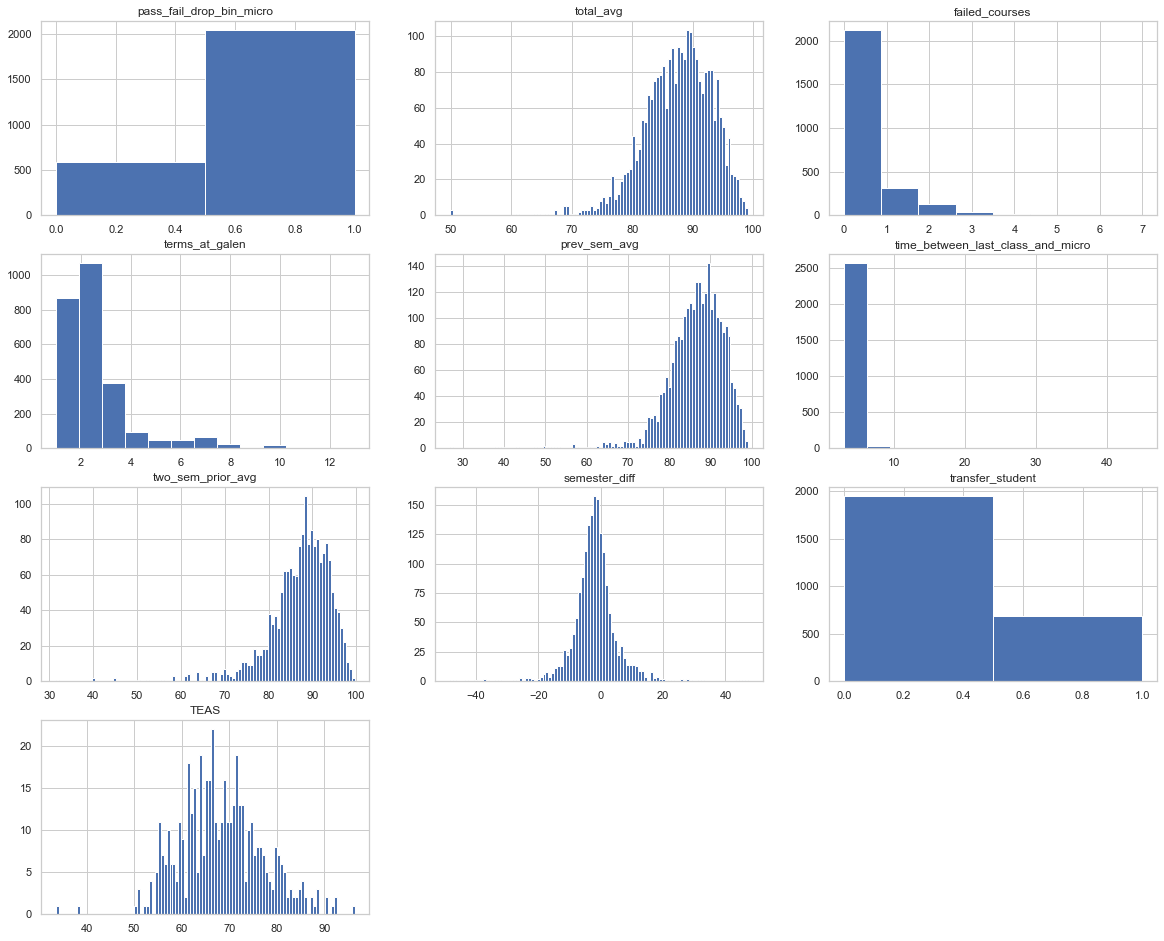

In [56]:
import seaborn as sns
sns.set(style="whitegrid")  
fig = plt.figure(figsize=(20, 25))

for i in range(dataset_num.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset_num.columns.values[i])
    
    vals = np.size(dataset_num.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset_num.iloc[:,i], bins=vals)

#sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])


Most Positive Correlations: 
 total_avg                 0.388791
prev_sem_avg              0.313807
two_sem_prior_avg_test    0.249339
semester_diff_test        0.096170
dtype: float64

Most Negative Correlations: 
 time_between_last_class_and_micro   -0.012135
terms_at_galen                      -0.018853
transfer_student                    -0.031409
teas_test                           -0.060675
failed_courses                      -0.205377
dtype: float64



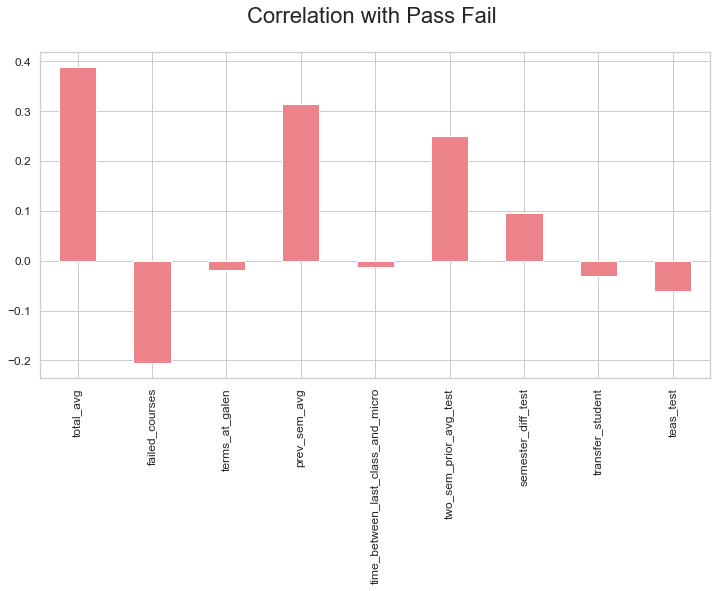

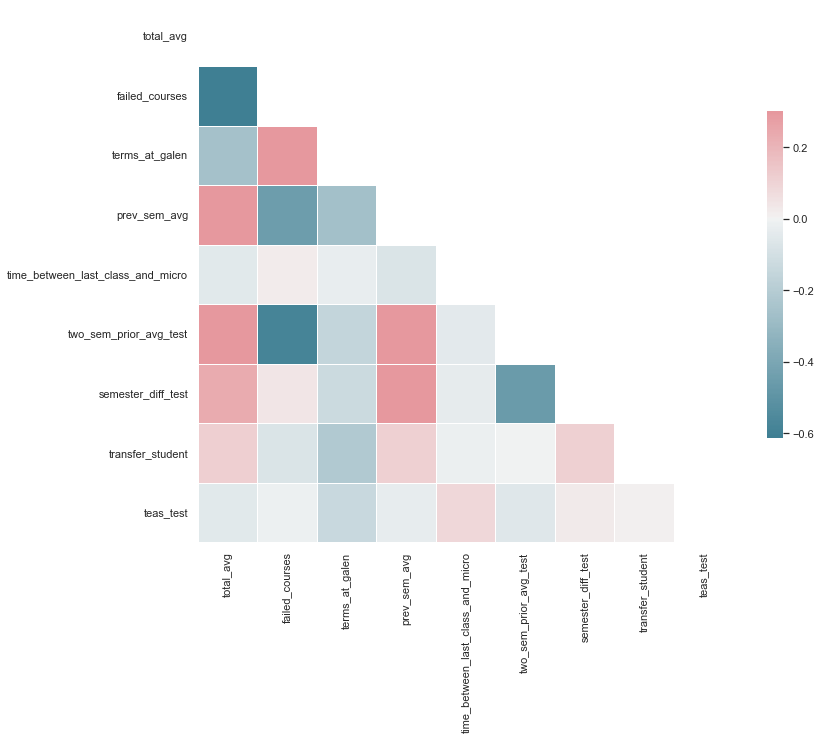


                           variables          VIF
0                          total_avg  1063.612390
1                     failed_courses     1.399075
2                     terms_at_galen     3.602430
3                       prev_sem_avg  1053.683044
4  time_between_last_class_and_micro     2.946573
5                   transfer_student     1.441493
6                 semester_diff_test     2.377594



In [57]:
df1['two_sem_prior_avg_test']=df1['two_sem_prior_avg'].fillna(df1['two_sem_prior_avg'].mean())
df1['semester_diff_test']=df1['prev_sem_avg'] - df1['two_sem_prior_avg_test']
#df1['semester_diff_test']=np.where(df1['semester_diff'].isna(),0,df1['prev_sem_avg'] - df1['two_sem_prior_avg_test'])
df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg_test',
        'semester_diff_test', 'transfer_student','teas_test']]



correlations = dataset2.corrwith(df1.pass_fail_drop_bin_micro)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)
print('')
correlations.plot.bar(
        figsize = (12, 6), fontsize = 12, color = '#ec838a',
        rot = 90, grid = True)

plt.title('Correlation with Pass Fail \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

print('')
## Set and compute the Correlation Matrix
sns.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

print("")
def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = df1[[
                'total_avg', 
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff_test'
               #,'teas_test'
               ]]

#1. Can't have all the GPAs in one area as they are highly correlated with each other. 
# total_avg seems to be their cumulative GPA, prev_sem_avg/two_sem_prior_avg are previous 
#semester's GPA so of course there's correlation here.

#dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
#       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg',
#        'semester_diff', 'transfer_student','TEAS']]
print(calc_vif(dataset2))
print("")

                           variables       VIF
0                     failed_courses  1.415915
1                     terms_at_galen  3.595934
2                       prev_sem_avg  5.799533
3  time_between_last_class_and_micro  2.961245
4                   transfer_student  1.428012
5                 semester_diff_test  1.085548
6                          teas_test  1.245864



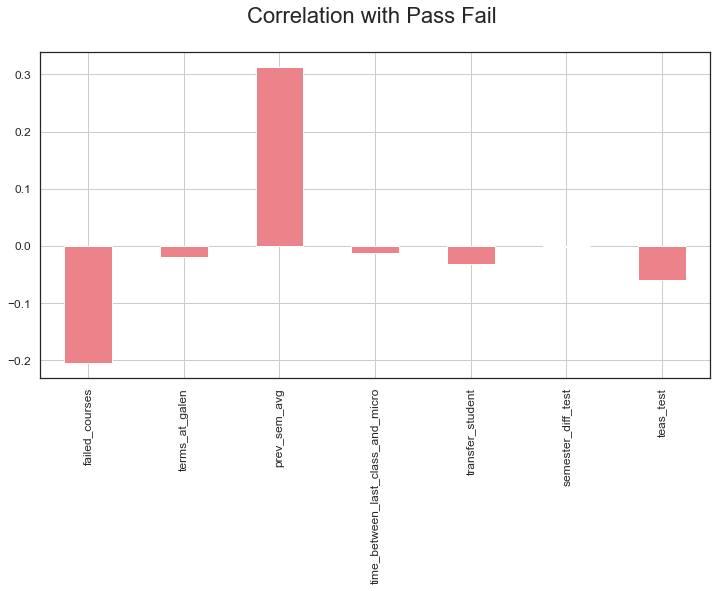

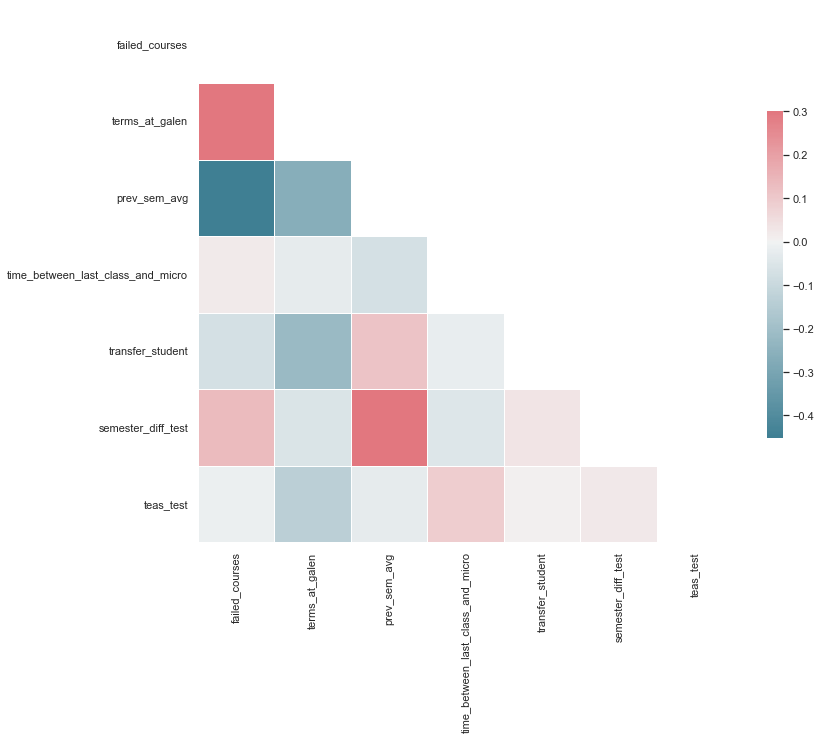

In [58]:
#df1['two_sem_prior_avg_test']=df1['two_sem_prior_avg'].fillna(df1['two_sem_prior_avg'].mean())
#df1['semester_diff_test']=df1['prev_sem_avg'] - df1['two_sem_prior_avg_test']
df1['semester_diff_test']=np.where(df1['semester_diff'].isna(),0,df1['prev_sem_avg'] - df1['two_sem_prior_avg'])
df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = df1[[
                #'total_avg', 
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff_test'
               ,'teas_test'
               ]]

#1. Can't have all the GPAs in one area as they are highly correlated with each other. 
# total_avg seems to be their cumulative GPA, prev_sem_avg/two_sem_prior_avg are previous 
#semester's GPA so of course there's correlation here.

#dataset2 = df1[['total_avg', 'failed_courses', 'terms_at_galen',
#       'prev_sem_avg', 'time_between_last_class_and_micro', 'two_sem_prior_avg',
#        'semester_diff', 'transfer_student','TEAS']]
print(calc_vif(dataset2))
print("")

correlations = dataset2.corrwith(df1.pass_fail_drop_bin_micro)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (12, 6), fontsize = 12, color = '#ec838a',
        rot = 90, grid = True)

plt.title('Correlation with Pass Fail \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

print("")
## Set and compute the Correlation Matrix
sns.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

In [97]:
#df1['teas_test']=np.where(df1['TEAS'].isna(),0,1)

df2 = df1[[
                #'total_avg',
                'StudentID',
               'pass_fail_drop_bin_micro',
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff'
               ,'TEAS'

            ]]

In [83]:
#print(df1["failed_courses"].describe())
print(" ")
print(df1["pass_fail_drop_bin_micro"].value_counts())
print(" ")
print(df1["pass_fail_drop_bin_micro"].value_counts(normalize=True))
print(" ")
#df1["failed_courses"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["failed_courses"].describe())
print(" ")
print(df1["failed_courses"].value_counts())
print(" ")
print(df1["failed_courses"].value_counts(normalize=True))
print(" ")
#df1["failed_courses"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["terms_at_galen"].describe())
print(" ")
print(df1["terms_at_galen"].value_counts())
print(" ")
print(df1["terms_at_galen"].value_counts(normalize=True))
print(" ")
#df1["terms_at_galen"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["prev_sem_avg"].describe())
print(" ")
print(df1["prev_sem_avg"].value_counts())
print(" ")
print(df1["prev_sem_avg"].value_counts(normalize=True))
print(" ")
#df1["prev_sem_avg"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["time_between_last_class_and_micro"].describe())
print(" ")
print(df1["time_between_last_class_and_micro"].value_counts())
print(" ")
print(df1["time_between_last_class_and_micro"].value_counts(normalize=True))
print(" ")
#df1["time_between_last_class_and_micro"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["transfer_student"].describe())
print(" ")
print(df1["transfer_student"].value_counts())
print(" ")
print(df1["transfer_student"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")


#print(df1["semester_diff"].describe())
print(" ")
print(df1["semester_diff"].value_counts())
print(" ")
print(df1["semester_diff"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(df1["TEAS"].describe())
print(" ")
print(df1["TEAS"].value_counts())
print(" ")
print(df1["TEAS"].value_counts(normalize=True))
print(" ")
#df1["transfer_student"].value_counts().plot(kind="bar")
#plt.show()
print(" ")

#print(" ")
#print(df1["failed_courses_2"].describe())
#print(" ")
#print(df1["failed_courses_2"].value_counts())
#print(" ")
#print(df1["failed_courses_2"].value_counts(normalize=True))
#print(" ")
#df1["failed_courses_2"].value_counts().plot(kind="bar")
#plt.show()
#print(" ")

 
1    2036
0     591
Name: pass_fail_drop_bin_micro, dtype: int64
 
1    0.775029
0    0.224971
Name: pass_fail_drop_bin_micro, dtype: float64
 
 
 
0.0    2116
1.0     312
2.0     127
3.0      38
4.0      19
5.0       8
6.0       6
7.0       1
Name: failed_courses, dtype: int64
 
0.0    0.805482
1.0    0.118767
2.0    0.048344
3.0    0.014465
4.0    0.007233
5.0    0.003045
6.0    0.002284
7.0    0.000381
Name: failed_courses, dtype: float64
 
 
 
2.0     1067
1.0      869
3.0      378
4.0       94
7.0       68
6.0       51
5.0       46
8.0       23
10.0      17
9.0        9
11.0       3
12.0       1
13.0       1
Name: terms_at_galen, dtype: int64
 
2.0     0.406167
1.0     0.330796
3.0     0.143890
4.0     0.035782
7.0     0.025885
6.0     0.019414
5.0     0.017510
8.0     0.008755
10.0    0.006471
9.0     0.003426
11.0    0.001142
12.0    0.000381
13.0    0.000381
Name: terms_at_galen, dtype: float64
 
 
 
82.500000    11
82.000000    10
81.000000    10
77.500000     9
85.200000   

In [98]:
#df1["total_avg_2"] = np.where(df1["total_avg"].isnull(),"Not_Included",
#                              np.where(df1["total_avg"]<=65,"0-65",
#                              np.where(df1["total_avg"]<=70,"66-70",
#                              np.where(df1["total_avg"]<=80,"71-80",
#                              np.where(df1["total_avg"]<=90,"81-90","91-100"
#                                      )))))

df2["failed_courses_2"] = np.where(df2["failed_courses"].isnull(),"Not_Included",
                              np.where(df2["failed_courses"]==0,"Classes_Failed_0",
                              np.where(df2["failed_courses"]==1,"Classes_Failed_1","Classes_failed_2+"
                                      )))

df2["terms_at_galen_2"] = np.where(df2["terms_at_galen"].isnull(),"Not_Included",
                              np.where(df2["terms_at_galen"]==1,"Terms_At_Galen_1",
                              np.where(df2["terms_at_galen"]==2,"Terms_At_Galen_2",
                              np.where(df2["terms_at_galen"]==3,"Terms_At_Galen_3","Terms_At_Galen_4+"
                                      ))))


df2["prev_sem_avg_2"] = np.where(df2["prev_sem_avg"].isnull(),"Not_Included",
                              np.where(df2["prev_sem_avg"]<=65,"0-65",
                              np.where(df2["prev_sem_avg"]<=70,"66-70",
                              np.where(df2["prev_sem_avg"]<=80,"71-80",
                              np.where(df2["prev_sem_avg"]<=90,"81-90","91-100"
                                      )))))

df2["time_between_last_class_and_micro_2"] = np.where(df2["time_between_last_class_and_micro"].isnull(),"Not_Included",
                                                  np.where(df2["time_between_last_class_and_micro"]<=3,"0-3","4+"
                                                  ))


#df1["two_sem_prior_avg_2"] = np.where(df1["two_sem_prior_avg"].isnull(),"Not_Included",
#                              np.where(df1["two_sem_prior_avg"]<=65,"0-65",
#                              np.where(df1["two_sem_prior_avg"]<=70,"66-70",
#                              np.where(df1["two_sem_prior_avg"]<=80,"71-80",
#                              np.where(df1["two_sem_prior_avg"]<=90,"81-90","91-100"
#                                      )))))


df2["semester_diff_2"] = np.where(df2["semester_diff"].isnull(),"No_Two_Semesters_Prior",
                              #np.where(df1["semester_diff"]<=-10,"Less_than_-10",
                              #np.where(df1["semester_diff"]<=0,"-9_0",
                              #np.where(df1["semester_diff"]<=10,"0_10","11+"
                              np.where(df2["semester_diff"]<=0,"Grade_Drop",
                              np.where(df2["semester_diff"]==0,"No_Grade_Change","Grade_Increase"                                 
                                      )))

#df1["TEAS_2"] = np.where(df1["TEAS"].isnull(),"Not_Included",
#                              np.where(df1["semester_diff"]<=68,"Less_than_Avg_68","Better_than_Avg_68"
#                                      ))

df2["TEAS_2"] = np.where(df2["TEAS"].isnull(),0,1)


C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   StudentID                            2627 non-null   object 
 1   pass_fail_drop_bin_micro             2627 non-null   int32  
 2   failed_courses                       2627 non-null   float64
 3   terms_at_galen                       2627 non-null   float64
 4   prev_sem_avg                         2627 non-null   float64
 5   time_between_last_class_and_micro    2627 non-null   float64
 6   transfer_student                     2627 non-null   float64
 7   semester_diff                        1757 non-null   float64
 8   TEAS                                 469 non-null    float64
 9   failed_courses_2                     2627 non-null   object 
 10  terms_at_galen_2                     2627 non-null   object 
 11  prev_sem_avg_2                

In [100]:
df2['pass_fail_drop_bin_micro'] = df2['pass_fail_drop_bin_micro'].astype(str)
#df2['transfer_student_2'] = df2['transfer_student'].astype(str)
df2['TEAS_2'] = df2['TEAS_2'].astype(str)

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   StudentID                            2627 non-null   object 
 1   pass_fail_drop_bin_micro             2627 non-null   object 
 2   failed_courses                       2627 non-null   float64
 3   terms_at_galen                       2627 non-null   float64
 4   prev_sem_avg                         2627 non-null   float64
 5   time_between_last_class_and_micro    2627 non-null   float64
 6   transfer_student                     2627 non-null   float64
 7   semester_diff                        1757 non-null   float64
 8   TEAS                                 469 non-null    float64
 9   failed_courses_2                     2627 non-null   object 
 10  terms_at_galen_2                     2627 non-null   object 
 11  prev_sem_avg_2                

In [104]:
cat_list = df2.select_dtypes(include=np.object).columns.tolist()


C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [105]:
cat_list =  ['pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']

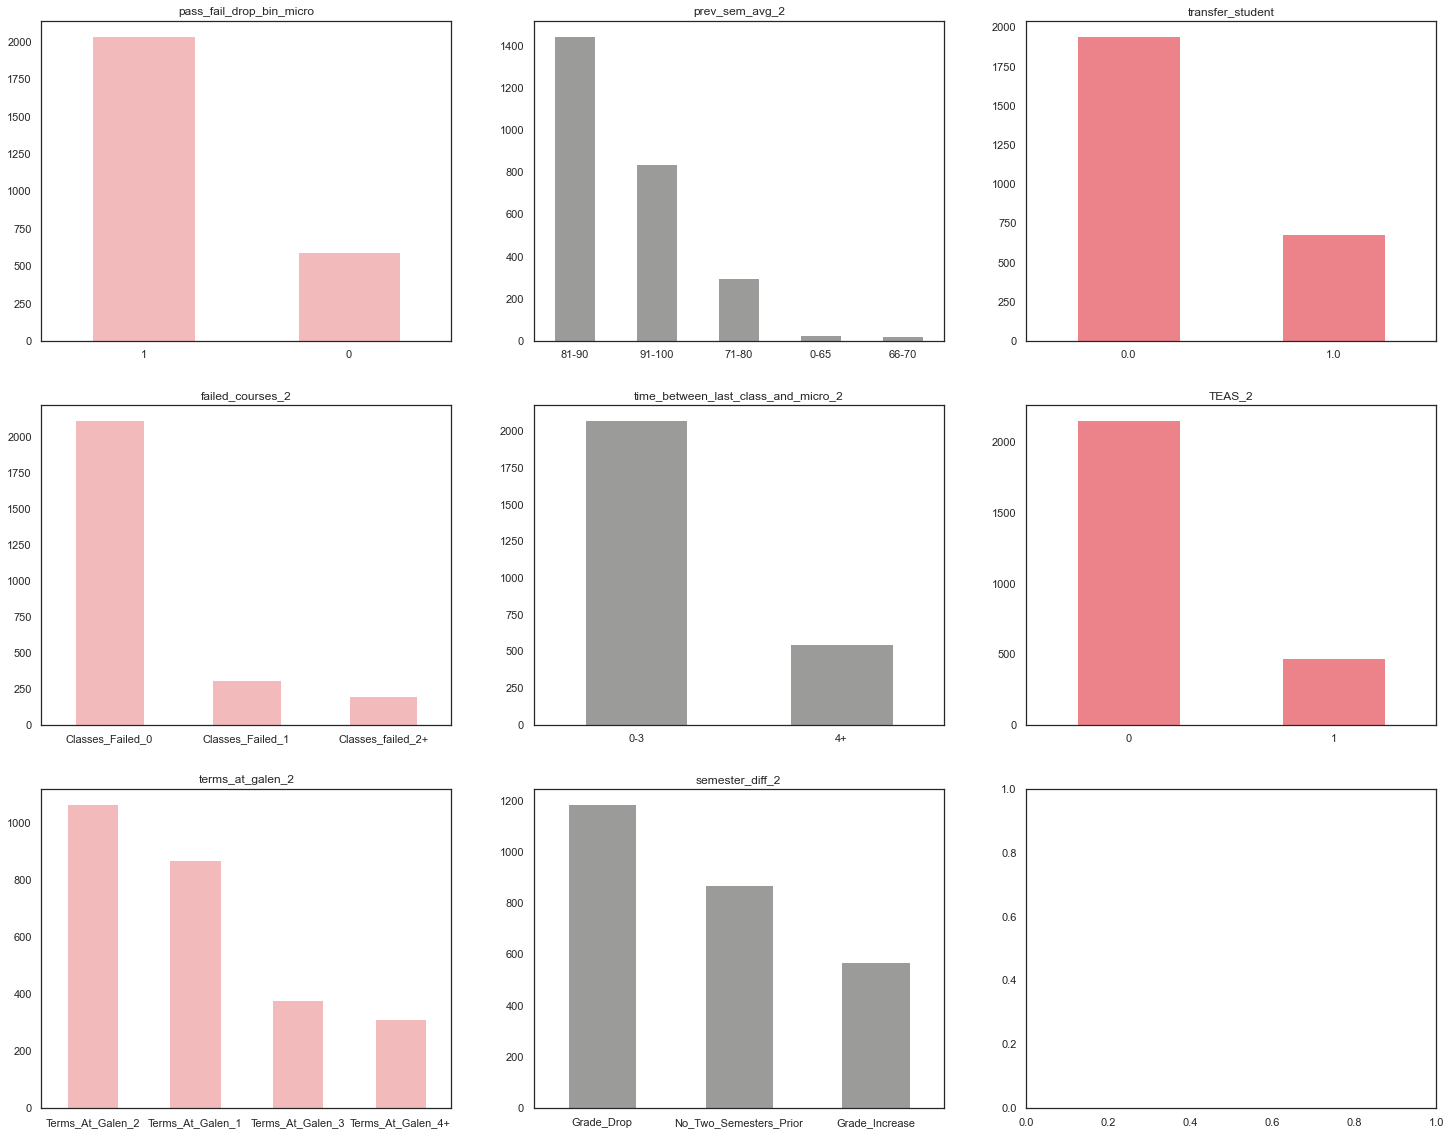

In [106]:

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (25,20))
for i, item in enumerate(cat_list):
    if i < 3:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = df2[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

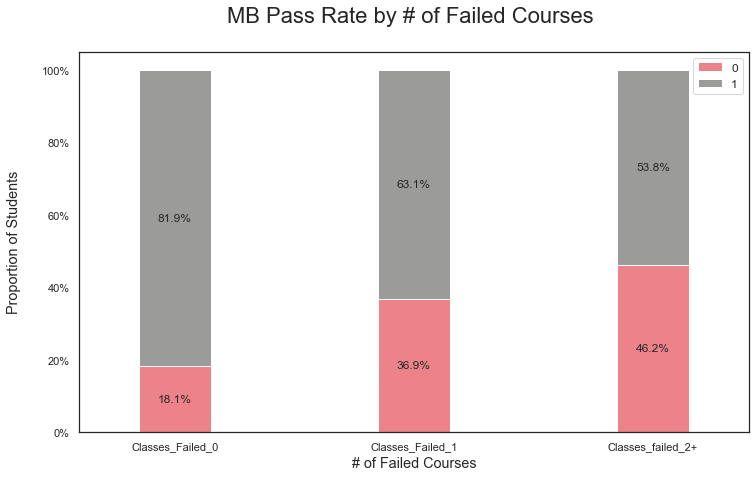

In [317]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['failed_courses_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('# of Failed Courses\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by # of Failed Courses \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


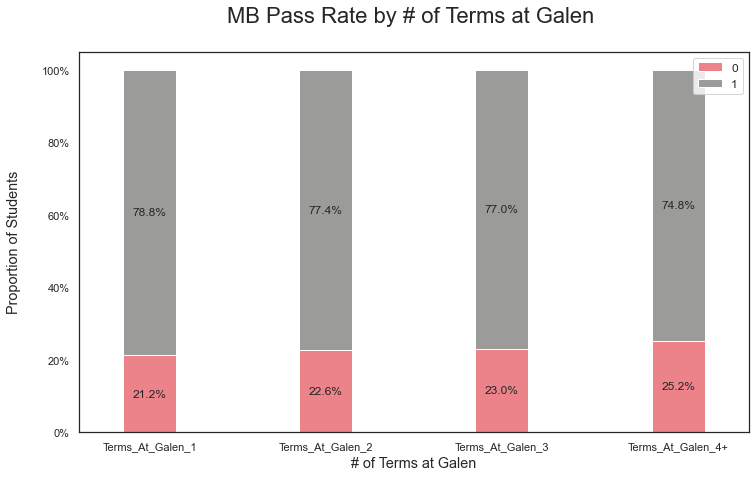

In [318]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['terms_at_galen_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('# of Terms at Galen\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by # of Terms at Galen \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


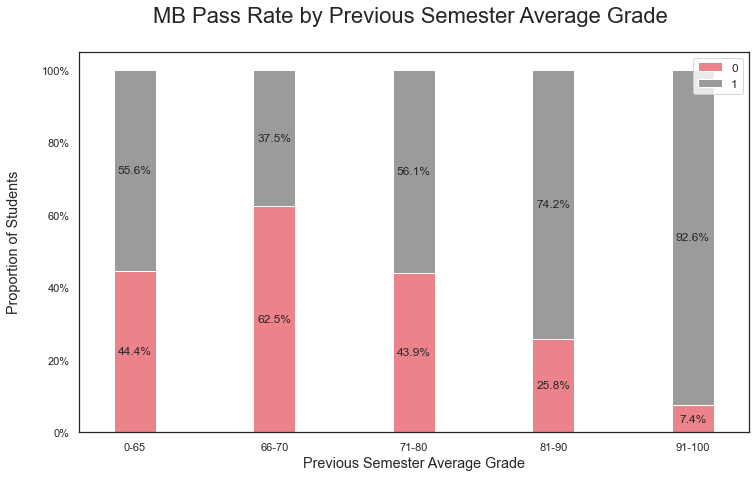

In [319]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['prev_sem_avg_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Previous Semester Average Grade\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Previous Semester Average Grade \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


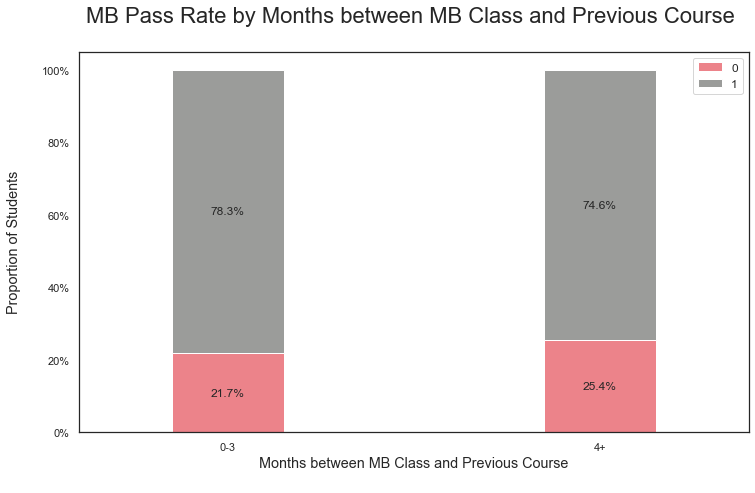

In [320]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['time_between_last_class_and_micro_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Months between MB Class and Previous Course\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Months between MB Class and Previous Course \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


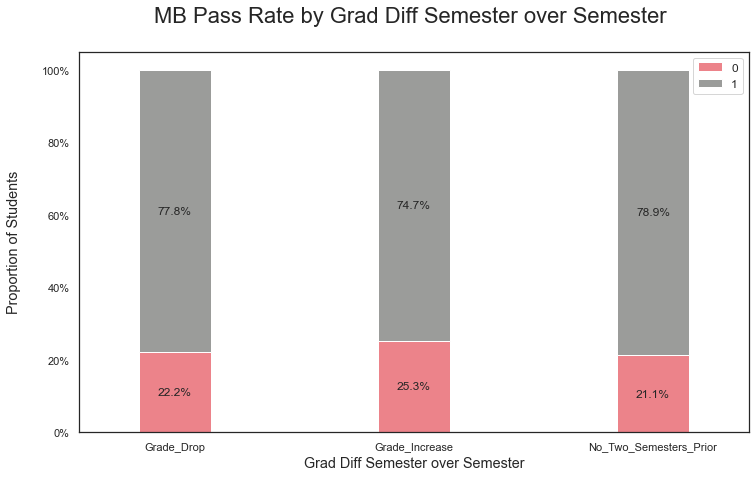

In [321]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['semester_diff_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Grad Diff Semester over Semester\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Grad Diff Semester over Semester \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


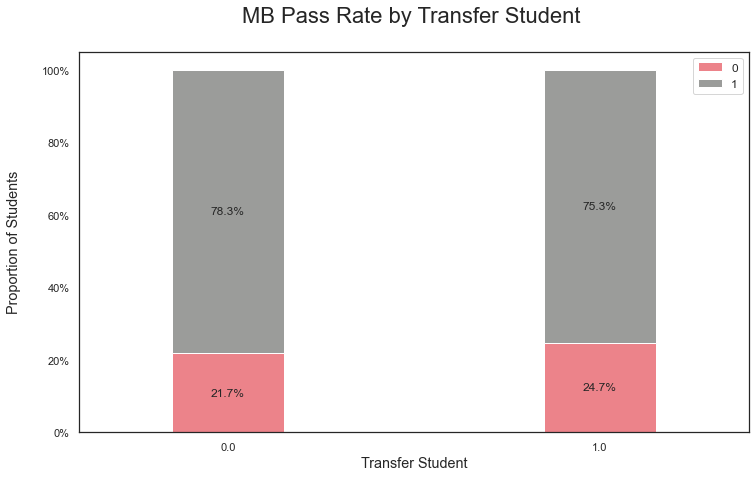

In [322]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['transfer_student','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Transfer Student\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by Transfer Student \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


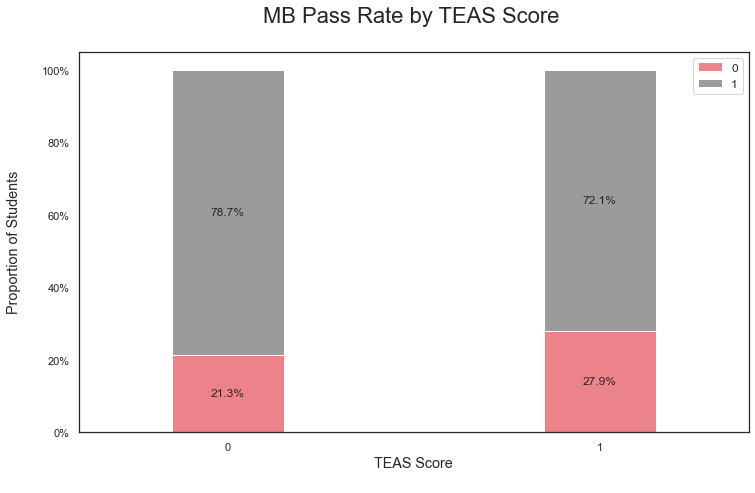

In [323]:
import matplotlib.ticker as mtick

contract_churn = df2.groupby(['TEAS_2','pass_fail_drop_bin_micro']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Students\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('TEAS Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('MB Pass Rate by TEAS Score \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


### Step 9.4 Making the Bins based on these Distributions/Testing

In [107]:
cat_list

['pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']

In [108]:
df3 = df2[['StudentID','pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'transfer_student',
 'TEAS_2']]

In [109]:
df3.columns = df3.columns.str.replace('_2', '')
df3.time_between_last_class_and_micro = np.where(df3.time_between_last_class_and_micro=='0-3',1,0)
#df3.transfer_student = np.where(df3.transfer_student=='1',1,0)


C:\Users\tleer\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [94]:
#df3.transfer_student = np.where(df3.transfer_student=='1',1,0)


C:\Users\tleer\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
df3.head()

,StudentID,pass_fail_drop_bin_micro,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,semester_diff,transfer_student,TEAS
0,1,1,Classes_failed_2+,Terms_At_Galen_2,81-90,1,Grade_Increase,1.0,0
1,2,1,Classes_Failed_0,Terms_At_Galen_2,91-100,1,Grade_Increase,0.0,0
2,3,0,Classes_Failed_1,Terms_At_Galen_3,81-90,1,Grade_Increase,0.0,0
3,4,1,Classes_Failed_0,Terms_At_Galen_2,91-100,1,Grade_Drop,0.0,0
4,5,0,Classes_Failed_0,Terms_At_Galen_1,81-90,1,No_Two_Semesters_Prior,1.0,0


In [111]:
df3.nunique()

StudentID                            2627
pass_fail_drop_bin_micro                2
failed_courses                          3
terms_at_galen                          4
prev_sem_avg                            5
time_between_last_class_and_micro       2
semester_diff                           3
transfer_student                        2
TEAS                                    2
dtype: int64

In [112]:
OHE = ['failed_courses','terms_at_galen','prev_sem_avg','semester_diff']

In [113]:
dataset3a = pd.get_dummies(data=df3, columns=[col for col in df3.columns if col in OHE], drop_first=True)
dataset3b = pd.get_dummies(data=df3, columns=[col for col in df3.columns if col in OHE])

In [114]:
dataset3a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StudentID                             2627 non-null   object 
 1   pass_fail_drop_bin_micro              2627 non-null   object 
 2   time_between_last_class_and_micro     2627 non-null   int32  
 3   transfer_student                      2627 non-null   float64
 4   TEAS                                  2627 non-null   object 
 5   failed_courses_Classes_Failed_1       2627 non-null   uint8  
 6   failed_courses_Classes_failed_2+      2627 non-null   uint8  
 7   terms_at_galen_Terms_At_Galen_2       2627 non-null   uint8  
 8   terms_at_galen_Terms_At_Galen_3       2627 non-null   uint8  
 9   terms_at_galen_Terms_At_Galen_4+      2627 non-null   uint8  
 10  prev_sem_avg_66-70                    2627 non-null   uint8  
 11  prev_sem_avg_71-8

In [115]:
## Don't use this one, it's just a test to see which values are being dropped in the process.
dataset3b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   StudentID                             2627 non-null   object 
 1   pass_fail_drop_bin_micro              2627 non-null   object 
 2   time_between_last_class_and_micro     2627 non-null   int32  
 3   transfer_student                      2627 non-null   float64
 4   TEAS                                  2627 non-null   object 
 5   failed_courses_Classes_Failed_0       2627 non-null   uint8  
 6   failed_courses_Classes_Failed_1       2627 non-null   uint8  
 7   failed_courses_Classes_failed_2+      2627 non-null   uint8  
 8   terms_at_galen_Terms_At_Galen_1       2627 non-null   uint8  
 9   terms_at_galen_Terms_At_Galen_2       2627 non-null   uint8  
 10  terms_at_galen_Terms_At_Galen_3       2627 non-null   uint8  
 11  terms_at_galen_Te

--------

#### Step 10: Split dataset into dependent and independent variables

In [116]:
response = dataset3a["pass_fail_drop_bin_micro"]

dataset = dataset3a.drop(columns="pass_fail_drop_bin_micro")


In [122]:
## In this case, the person who made this code believes that using this "stratify" method can resolve class imbalance

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#He made sure that there was a proportional split when he uses stratify here. 
#Versus SMOTE where we're creating fake data. 
#In this case, since we have a decent customer size for both, no need for SMOTE.
#In the test split, there should be about 80 percent of the customers you keep and others that leave. 
#The stratify makes sure to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2101, 15)
Number transactions y_train dataset:  (2101,)
Number transactions X_test dataset:  (526, 15)
Number transactions y_test dataset:  (526,)


In [123]:
train_identity = X_train['StudentID']
X_train = X_train.drop(columns = ['StudentID'])

test_identity = X_test['StudentID']
X_test = X_test.drop(columns = ['StudentID'])


In [124]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [125]:
y_test

2436    0
1515    1
2046    1
1098    1
1748    0
       ..
401     1
2020    1
1926    1
2366    1
2397    1
Name: pass_fail_drop_bin_micro, Length: 526, dtype: object

In [127]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred, pos_label='1' )
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label='1')

In [128]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred, pos_label='1' )
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')
f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label='1')

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)


                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression   0.76616   0.790224  0.95098  0.863181  0.913801


In [129]:
#probability score
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [130]:

# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.78 (+/- 0.02)


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

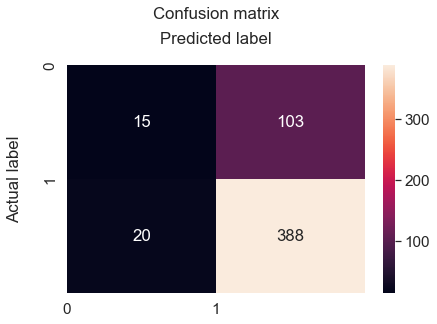

In [134]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


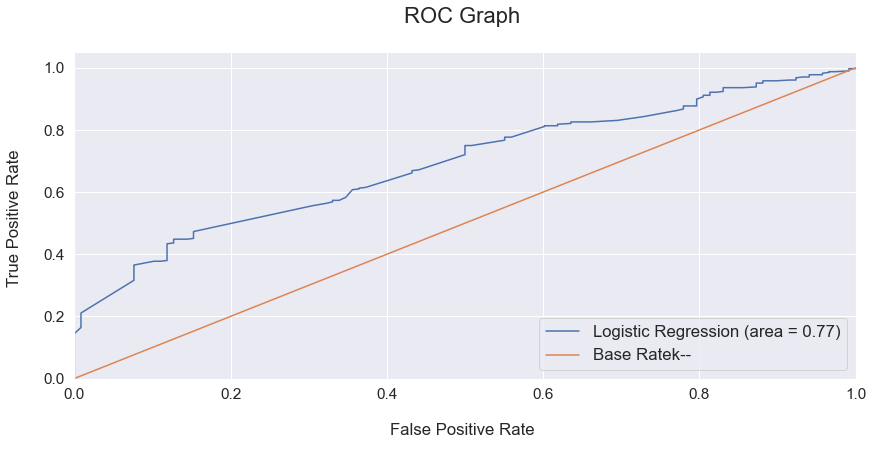

In [135]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1], pos_label='1' )
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


#### Step 17: Predict Feature Importance

In [136]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'StudentID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


,features,coef
11,prev_sem_avg_91-100,1.013496
10,prev_sem_avg_81-90,0.304448
6,terms_at_galen_Terms_At_Galen_3,0.167934
7,terms_at_galen_Terms_At_Galen_4+,0.139378
0,time_between_last_class_and_micro,0.092835
5,terms_at_galen_Terms_At_Galen_2,-0.031463
8,prev_sem_avg_66-70,-0.071402
9,prev_sem_avg_71-80,-0.082930
2,TEAS,-0.089275
1,transfer_student,-0.107494


In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StudentID                          2627 non-null   object 
 1   pass_fail_drop_bin_micro           2627 non-null   object 
 2   failed_courses                     2627 non-null   object 
 3   terms_at_galen                     2627 non-null   object 
 4   prev_sem_avg                       2627 non-null   object 
 5   time_between_last_class_and_micro  2627 non-null   int32  
 6   semester_diff                      2627 non-null   object 
 7   transfer_student                   2627 non-null   float64
 8   TEAS                               2627 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 195.0+ KB


In [530]:
y_pred_probs

array([0.72540321, 0.63580703, 0.79983151, 0.71534278, 0.79983151,
       0.5101741 , 0.92546814, 0.89137469, 0.51883414, 0.4418938 ,
       0.79983151, 0.67588958, 0.91172956, 0.72540321, 0.79983151,
       0.72412641, 0.91172956, 0.92546814, 0.79983151, 0.81564905,
       0.85408708, 0.90796152, 0.66675497, 0.92546814, 0.72540321,
       0.87557286, 0.73625372, 0.58941935, 0.72412641, 0.63580703,
       0.47377509, 0.89137469, 0.9494486 , 0.90796152, 0.79983151,
       0.92546814, 0.87072241, 0.92546814, 0.92502544, 0.92546814,
       0.58941935, 0.72532455, 0.79983151, 0.92546814, 0.87557286,
       0.95600086, 0.590834  , 0.9494486 , 0.79983151, 0.92502544,
       0.87072241, 0.92546814, 0.72532455, 0.68724893, 0.92546814,
       0.72540321, 0.92546814, 0.79983151, 0.79983151, 0.66627793,
       0.68724893, 0.9494486 , 0.90742524, 0.68724893, 0.72412641,
       0.62350864, 0.40487731, 0.92546814, 0.92546814, 0.63580703,
       0.9494486 , 0.36139413, 0.92546814, 0.74466992, 0.72412

#### Step 20: Format Final Results

In [531]:
## What you need to do here is get the probability off of y_train, qcut y_train. You're creating ten buckets using train, run predict on test, and then you map
## the predicted probability of deciles from train. Apply them to test.

## How Dan does this is potentially inner join and filter out where it is greater than a certain value.
## Ex. Decile 4 is 30-40. You have the propensity to convert, then inner join from where your predicted probability is greater than the minimum of the decile and less than the maximum

## If your first decile is 0-20% in train, anything that has a predicted probability within this during test should receive a 1 in ranking

final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["likely_to_pass(%)"] = y_pred_probs 

final_results["likely_to_pass(%)"] = final_results["likely_to_pass(%)"]*100

final_results["likely_to_pass(%)"]=final_results["likely_to_pass(%)"].round(2)

final_results = final_results[['StudentID', 'pass_fail_drop_bin_micro', 'predictions', 'likely_to_pass(%)']]

final_results ['Ranking'] = pd.qcut(final_results['likely_to_pass(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
#final_results ['Ranking'] = pd.cut(final_results['propensity_to_pass(%)'].rank(method = 'first')\
#                                   ,bins=[0, 65, 70, 80, 90, 101],labels=range(5,0,-1))

final_results = final_results.sort_values(by='Ranking', ascending=False)
print (final_results)


     StudentID pass_fail_drop_bin_micro predictions  likely_to_pass(%) Ranking
142        143                        1           1              97.07       1
2418      2419                        1           1              92.55       1
2239      2240                        1           1              93.72       1
1824      1825                        1           1              94.29       1
732        733                        1           1              95.60       1
...        ...                      ...         ...                ...     ...
597        598                        0           0              42.96      10
1974      1975                        0           0              37.31      10
953        954                        0           0              37.31      10
876        877                        1           1              55.80      10
686        687                        0           1              53.42      10

[526 rows x 5 columns]


In [532]:
final_results[final_results["Ranking"]==10].head()

,StudentID,pass_fail_drop_bin_micro,predictions,likely_to_pass(%),Ranking
1300,1301,0,0,44.19,10
215,216,1,0,47.38,10
1121,1122,1,0,47.38,10
818,819,0,1,53.42,10
1627,1628,1,0,48.69,10


In [533]:
dataset3a.head()

,StudentID,pass_fail_drop_bin_micro,time_between_last_class_and_micro,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior
0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0
1,2,1,1,0,0,0,1,0,0,0,0,0,1,1,0
2,3,0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,4,1,1,0,0,0,1,0,0,0,0,0,1,0,0
4,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [534]:
new_df = pd.merge(dataset3a, final_results, on=['StudentID', 'pass_fail_drop_bin_micro'], how='inner')

In [535]:
new_df.head()

,StudentID,pass_fail_drop_bin_micro,time_between_last_class_and_micro,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior,predictions,likely_to_pass(%),Ranking
0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,51.88,10
1,10,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,79.98,5
2,16,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,79.98,5
3,25,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,92.55,2
4,33,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,94.94,1


In [536]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   StudentID                             526 non-null    object  
 1   pass_fail_drop_bin_micro              526 non-null    object  
 2   time_between_last_class_and_micro     526 non-null    int32   
 3   TEAS                                  526 non-null    object  
 4   failed_courses_Classes_Failed_1       526 non-null    uint8   
 5   failed_courses_Classes_failed_2+      526 non-null    uint8   
 6   terms_at_galen_Terms_At_Galen_2       526 non-null    uint8   
 7   terms_at_galen_Terms_At_Galen_3       526 non-null    uint8   
 8   terms_at_galen_Terms_At_Galen_4+      526 non-null    uint8   
 9   prev_sem_avg_66-70                    526 non-null    uint8   
 10  prev_sem_avg_71-80                    526 non-null    uint8   
 11  prev_s

In [465]:
import pickle

In [ ]:
pickle.dump(classifier, open('model.pkl', 'wb'))

----------

#### New Dataset

In [ ]:
## https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/

In [537]:
df_score = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')
df_score['StudentID'] = df_score['StudentID'].astype(str)

df_score['semester_diff_test']=np.where(df_score['semester_diff'].isna(),0,df_score['prev_sem_avg'] - df_score['two_sem_prior_avg'])
df_score['teas_test']=np.where(df_score['TEAS'].isna(),0,1)

cat_list = df_score.select_dtypes(include=np.object).columns.tolist()
num_list = df_score.select_dtypes(include=np.number).columns.tolist()

df_score = df_score[[
                #'total_avg',
                'StudentID',
               #'pass_fail_drop_bin_micro',
                'failed_courses', 'terms_at_galen',
               'prev_sem_avg', 
               'time_between_last_class_and_micro', 'transfer_student',
               #'two_sem_prior_avg_test',
               'semester_diff'
               ,'TEAS'

            ]]

#df1["total_avg_2"] = np.where(df1["total_avg"].isnull(),"Not_Included",
#                              np.where(df1["total_avg"]<=65,"0-65",
#                              np.where(df1["total_avg"]<=70,"66-70",
#                              np.where(df1["total_avg"]<=80,"71-80",
#                              np.where(df1["total_avg"]<=90,"81-90","91-100"
#                                      )))))

df_score["failed_courses_2"] = np.where(df_score["failed_courses"].isnull(),"Not_Included",
                              np.where(df_score["failed_courses"]==0,"Classes_Failed_0",
                              np.where(df_score["failed_courses"]==1,"Classes_Failed_1","Classes_failed_2+"
                                      )))

df_score["terms_at_galen_2"] = np.where(df_score["terms_at_galen"].isnull(),"Not_Included",
                              np.where(df_score["terms_at_galen"]==1,"Terms_At_Galen_1",
                              np.where(df_score["terms_at_galen"]==2,"Terms_At_Galen_2",
                              np.where(df_score["terms_at_galen"]==3,"Terms_At_Galen_3","Terms_At_Galen_4+"
                                      ))))


df_score["prev_sem_avg_2"] = np.where(df_score["prev_sem_avg"].isnull(),"Not_Included",
                              np.where(df_score["prev_sem_avg"]<=65,"0-65",
                              np.where(df_score["prev_sem_avg"]<=70,"66-70",
                              np.where(df_score["prev_sem_avg"]<=80,"71-80",
                              np.where(df_score["prev_sem_avg"]<=90,"81-90","91-100"
                                      )))))

df_score["time_between_last_class_and_micro_2"] = np.where(df_score["time_between_last_class_and_micro"].isnull(),"Not_Included",
                                                  np.where(df_score["time_between_last_class_and_micro"]<=3,"0-3","4+"
                                                  ))


#df1["two_sem_prior_avg_2"] = np.where(df1["two_sem_prior_avg"].isnull(),"Not_Included",
#                              np.where(df1["two_sem_prior_avg"]<=65,"0-65",
#                              np.where(df1["two_sem_prior_avg"]<=70,"66-70",
#                              np.where(df1["two_sem_prior_avg"]<=80,"71-80",
#                              np.where(df1["two_sem_prior_avg"]<=90,"81-90","91-100"
#                                      )))))


df_score["semester_diff_2"] = np.where(df_score["semester_diff"].isnull(),"No_Two_Semesters_Prior",
                              #np.where(df1["semester_diff"]<=-10,"Less_than_-10",
                              #np.where(df1["semester_diff"]<=0,"-9_0",
                              #np.where(df1["semester_diff"]<=10,"0_10","11+"
                              np.where(df_score["semester_diff"]<=0,"Grade_Drop",
                              np.where(df_score["semester_diff"]==0,"No_Grade_Change","Grade_Increase"                                 
                                      )))

#df1["TEAS_2"] = np.where(df1["TEAS"].isnull(),"Not_Included",
#                              np.where(df1["semester_diff"]<=68,"Less_than_Avg_68","Better_than_Avg_68"
#                                      ))

df_score["TEAS_2"] = np.where(df_score["TEAS"].isnull(),0,1)

df_score.transfer_student_2 = df_score.transfer_student.astype(str)
df_score.TEAS_2 = df_score.TEAS_2.astype(str)

cat_list = df_score.select_dtypes(include=np.object).columns.tolist()


cat_list =  [
    #'pass_fail_drop_bin_micro',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'TEAS_2']

df_score = df_score[['StudentID',
 'failed_courses_2',
 'terms_at_galen_2',
 'prev_sem_avg_2',
 'time_between_last_class_and_micro_2',
 'semester_diff_2',
 'TEAS_2']]

df_score.columns = df_score.columns.str.replace('_2', '')
df_score.time_between_last_class_and_micro = np.where(df_score.time_between_last_class_and_micro=='0-3',1,0)

OHE = ['failed_courses','terms_at_galen','prev_sem_avg','semester_diff']
dataset3a_score = pd.get_dummies(data=df_score, columns=[col for col in df_score.columns if col in OHE], drop_first=True)
dataset3b_score = pd.get_dummies(data=df_score, columns=[col for col in df_score.columns if col in OHE])

#dataset_score = dataset3a_score.drop(columns="StudentID")
test_identity_score = dataset3a_score['StudentID']
dataset3a_score = dataset3a_score.drop(columns = ['StudentID'])

C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [538]:
dataset3a_score.head()

,time_between_last_class_and_micro,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior
0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,1,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1,0,0


In [539]:
sc_X = StandardScaler()
dataset_score2 = pd.DataFrame(sc_X.fit_transform(dataset3a_score))
dataset_score2.columns = dataset3a_score.columns.values
dataset_score2.index = dataset3a_score.index.values
dataset3a_score = dataset_score2

#sc_X = StandardScaler()
#X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
#X_train2.columns = X_train.columns.values
#X_train2.index = X_train.index.values
#X_train = X_train2


In [540]:
dataset3a_score.head()

,time_between_last_class_and_micro,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior
0,0.476308,-0.4632,-0.368985,-0.281341,-0.720849,-0.392115,-0.421445,-0.045502,-0.354375,-1.090892,1.409842,-0.51834,1.293844
1,0.476308,-0.4632,2.710134,-0.281341,-0.720849,2.550270,-0.421445,-0.045502,2.821872,-1.090892,-0.709299,-0.51834,-0.772891
2,0.476308,-0.4632,-0.368985,-0.281341,1.387253,-0.392115,-0.421445,-0.045502,-0.354375,0.916681,-0.709299,-0.51834,-0.772891
3,0.476308,-0.4632,-0.368985,-0.281341,-0.720849,-0.392115,-0.421445,-0.045502,-0.354375,0.916681,-0.709299,-0.51834,1.293844
4,0.476308,-0.4632,-0.368985,-0.281341,1.387253,-0.392115,-0.421445,-0.045502,-0.354375,-1.090892,1.409842,-0.51834,-0.772891


In [541]:
y_pred_2 = classifier.predict(dataset3a_score)


In [542]:
#probability score
y_pred_probs_score = classifier.predict_proba(dataset3a_score)
y_pred_probs_score  = y_pred_probs_score [:, 1]


In [543]:
y_pred_2

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1

In [544]:
y_pred_probs_score

array([0.92277775, 0.61297821, 0.79568579, 0.72361586, 0.94673688,
       0.93378165, 0.79568579, 0.79568579, 0.79568579, 0.79568579,
       0.79568579, 0.79568579, 0.92277775, 0.75547946, 0.72361586,
       0.92277775, 0.92277775, 0.61643858, 0.92277775, 0.92277775,
       0.92277775, 0.94673688, 0.94673688, 0.61643858, 0.87479418,
       0.92108596, 0.92108596, 0.79568579, 0.79568579, 0.92108596,
       0.72361586, 0.71889003, 0.5568423 , 0.92277775, 0.92108596,
       0.30361067, 0.94673688, 0.79568579, 0.92108596, 0.87479418,
       0.52921504, 0.94673688, 0.79568579, 0.75547946, 0.9544219 ,
       0.92277775, 0.7933003 , 0.93378165, 0.92277775, 0.69581574,
       0.71889003, 0.79568579, 0.92277775, 0.87479418, 0.79568579,
       0.79568579, 0.87479418, 0.87479418, 0.92277775, 0.79568579,
       0.72361586, 0.68145152, 0.72361586, 0.92108596, 0.58985697,
       0.65461964, 0.72361586, 0.71889003, 0.94673688, 0.92277775,
       0.87479418, 0.87479418, 0.61297821, 0.72361586, 0.72361

In [555]:
final_results_score = pd.concat([test_identity_score, dataset3a_score], axis = 1).dropna()
final_results_score['predictions'] = y_pred_2
final_results_score["likely_to_pass(%)"] = y_pred_probs_score 
final_results_score["likely_to_pass(%)"] = final_results_score["likely_to_pass(%)"]*100
final_results_score["likely_to_pass(%)"] = final_results_score["likely_to_pass(%)"].round(2)

final_results_score = final_results_score[['StudentID', 'predictions', 'likely_to_pass(%)']]
final_results_score['Ranking'] = pd.qcut(final_results_score['likely_to_pass(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results_score = final_results_score#.sort_values(by='StudentID', ascending=True)
print (final_results_score)

    StudentID predictions  likely_to_pass(%) Ranking
0           1           1              92.28       3
1           2           1              61.30       9
2           3           1              79.57       6
3           4           1              72.36       7
4           5           1              94.67       1
..        ...         ...                ...     ...
963       964           1              71.59       8
964       965           1              58.30      10
965       966           1              79.57       5
966       967           1              79.57       5
967       968           1              71.59       8

[968 rows x 4 columns]


In [556]:
final_results_score

,StudentID,predictions,likely_to_pass(%),Ranking
0,1,1,92.28,3
1,2,1,61.30,9
2,3,1,79.57,6
3,4,1,72.36,7
4,5,1,94.67,1
...,...,...,...,...
963,964,1,71.59,8
964,965,1,58.30,10
965,966,1,79.57,5
966,967,1,79.57,5


In [591]:
final_results_score[final_results_score['predictions']=='0'].head()

,StudentID,predictions,likely_to_pass(%),Ranking
35,36,0,30.36,10
90,91,0,37.25,10
107,108,0,43.89,10
114,115,0,43.04,10
121,122,0,46.89,10


In [551]:
final_results_score.predictions.value_counts()

1    915
0     53
Name: predictions, dtype: int64

In [547]:
final_results

,StudentID,pass_fail_drop_bin_micro,predictions,likely_to_pass(%),Ranking
142,143,1,1,97.07,1
2418,2419,1,1,92.55,1
2239,2240,1,1,93.72,1
1824,1825,1,1,94.29,1
732,733,1,1,95.60,1
...,...,...,...,...,...
597,598,0,0,42.96,10
1974,1975,0,0,37.31,10
953,954,0,0,37.31,10
876,877,1,1,55.80,10


In [576]:
df_final = pd.read_excel(f'{path}/Data/data_science_candidate_score_file.xlsx')
df_final.StudentID = df_final.StudentID.astype(str)

In [577]:
df_final.shape

(968, 10)

In [578]:
df_final.head()

,StudentID,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
0,1,92.940000,0,1,92.94,3,NaN,NaN,1,NaN
1,2,85.536364,1,3,75.70,3,80.80,-5.10,0,NaN
2,3,88.542857,0,2,88.00,3,88.95,-0.95,1,NaN
3,4,88.380000,0,1,88.38,3,NaN,NaN,1,NaN
4,5,91.910000,0,2,90.64,3,93.18,-2.54,0,NaN


In [579]:
final_results_score.shape

(968, 4)

In [587]:
final_results_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 0 to 967
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   StudentID          968 non-null    object  
 1   predictions        968 non-null    object  
 2   likely_to_pass(%)  968 non-null    float64 
 3   Ranking            968 non-null    category
dtypes: category(1), float64(1), object(2)
memory usage: 31.3+ KB


In [580]:
final_results_score.head()

,StudentID,predictions,likely_to_pass(%),Ranking
0,1,1,92.28,3
1,2,1,61.30,9
2,3,1,79.57,6
3,4,1,72.36,7
4,5,1,94.67,1


In [583]:
final_results_score_2 = final_results_score.iloc[:,:2]

In [584]:
final_results_score_2.head()

,StudentID,predictions
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [588]:
final_results_score_2['predictions_long'] = np.where(final_results_score_2['predictions']=='1','Pass','Fail')
df_final_score_file = pd.merge(final_results_score_2, df_final, on=['StudentID'], how='inner')


In [589]:
df_final_score_file.head()

,StudentID,predictions,predictions_long,total_avg,failed_courses,terms_at_galen,prev_sem_avg,time_between_last_class_and_micro,two_sem_prior_avg,semester_diff,transfer_student,TEAS
0,1,1,Pass,92.940000,0,1,92.94,3,NaN,NaN,1,NaN
1,2,1,Pass,85.536364,1,3,75.70,3,80.80,-5.10,0,NaN
2,3,1,Pass,88.542857,0,2,88.00,3,88.95,-0.95,1,NaN
3,4,1,Pass,88.380000,0,1,88.38,3,NaN,NaN,1,NaN
4,5,1,Pass,91.910000,0,2,90.64,3,93.18,-2.54,0,NaN


In [590]:
df_final_score_file.to_excel("Final_Score_File.xlsx")

-------------------

#### Testing Finished

In [25]:
# Printing number of observations, variables including the target, and duplicate samples
print(f"Number of clients: {df1.shape[0]}")
print(f"Number of variables: {df1.shape[1]} incl. target")
print(f"Number of duplicate entries: {df1.duplicated().sum()}")

Number of clients: 2629
Number of variables: 12 incl. target
Number of duplicate entries: 0


In [26]:
absolut = df1["pass_fail_drop_bin_micro"].value_counts().to_frame().rename(columns={"pass_fail_drop_bin_micro":"clients"})
percent = (df1["pass_fail_drop_bin_micro"].value_counts(normalize=True) *100).to_frame().rename(columns={"pass_fail_drop_bin_micro":"%"})
df_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)

[0] Number of students that didn't pass: 2038
[1] Number of clients that passed: 591


,clients,%
1,2038,77.52
0,591,22.48


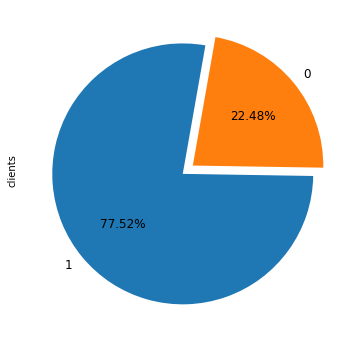

In [27]:
print(f"[0] Number of students that didn't pass: {df1.pass_fail_drop_bin_micro.value_counts()[0]}")
print(f"[1] Number of clients that passed: {df1.pass_fail_drop_bin_micro.value_counts()[1]}")

display(df_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

##### Step 6 : Clean the Dataset and take care of missing data

In [28]:
df2 = df1

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 0 to 2629
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   StudentID                          2629 non-null   int64  
 1   num_grade_micro                    2629 non-null   float64
 2   pass_fail_drop_bin_micro           2629 non-null   object 
 3   total_avg                          2628 non-null   float64
 4   failed_courses                     2628 non-null   float64
 5   terms_at_galen                     2628 non-null   float64
 6   prev_sem_avg                       2628 non-null   float64
 7   time_between_last_class_and_micro  2628 non-null   float64
 8   two_sem_prior_avg                  1758 non-null   float64
 9   semester_diff                      1758 non-null   float64
 10  transfer_student                   2628 non-null   float64
 11  TEAS                               470 non-null    float

In [30]:
#df2[df2['two_sem_prior_avg'].isnull()].head()

In [31]:
#df2[~(df2['two_sem_prior_avg'].isnull())].head()

In [32]:
#df2[~(df2['TEAS'].isnull())].head()

In [60]:
#dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

#dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

In [68]:
na_cols = df2.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()


In [69]:
na_cols

['total_avg',
 'failed_courses',
 'terms_at_galen',
 'prev_sem_avg',
 'time_between_last_class_and_micro',
 'two_sem_prior_avg',
 'semester_diff',
 'transfer_student',
 'TEAS']

In [71]:
#Revalidate:
  
df2.isna().any()  


StudentID                            False
num_grade_micro                      False
pass_fail_drop_bin_micro             False
total_avg                            False
failed_courses                       False
terms_at_galen                       False
prev_sem_avg                         False
time_between_last_class_and_micro    False
two_sem_prior_avg                    False
semester_diff                        False
transfer_student                     False
TEAS                                 False
dtype: bool

In [70]:
for col in df2.columns[1:]:
     if col in na_cols:
        if df2[col].dtype != 'object':
             df2[col] =  df2[col].fillna(df2[col].mean()).round(0)

In [193]:
#*Find the average and fill missing values of each columns programmatically.

na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [194]:
#Revalidate:
  
dataset.isna().any()  


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

##### Step 7 : Label Encode Binary data

In [195]:
#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


#### Section B: Data Evaluation

##### Step 9.1: EDA

In [196]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


In [197]:
cat_list = dataset.select_dtypes(include=np.object).columns.tolist()
num_list = dataset.select_dtypes(include=np.number).columns.tolist()

C:\Users\tleer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [198]:
num_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [199]:
cat_list
cat_list.remove('customerID')

In [200]:
dataset_num = dataset[num_list]
dataset_cat = dataset[cat_list]

In [201]:
len(cat_list)

10

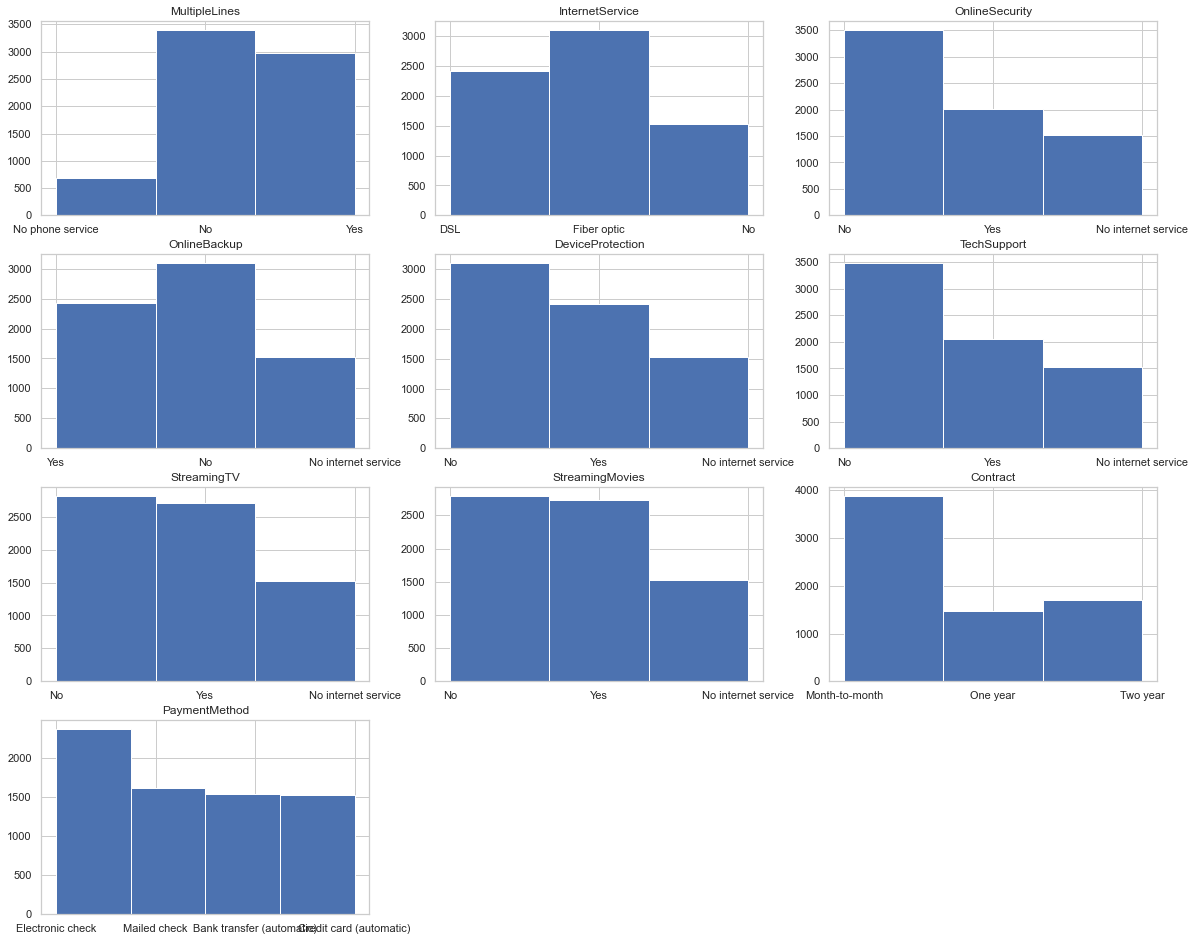

In [202]:
import seaborn as sns
sns.set(style="whitegrid")  
fig = plt.figure(figsize=(20, 25))

for i in range(dataset_cat.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset_cat.columns.values[i])
    
    vals = np.size(dataset_cat.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset_cat.iloc[:,i], bins=vals)

#sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])


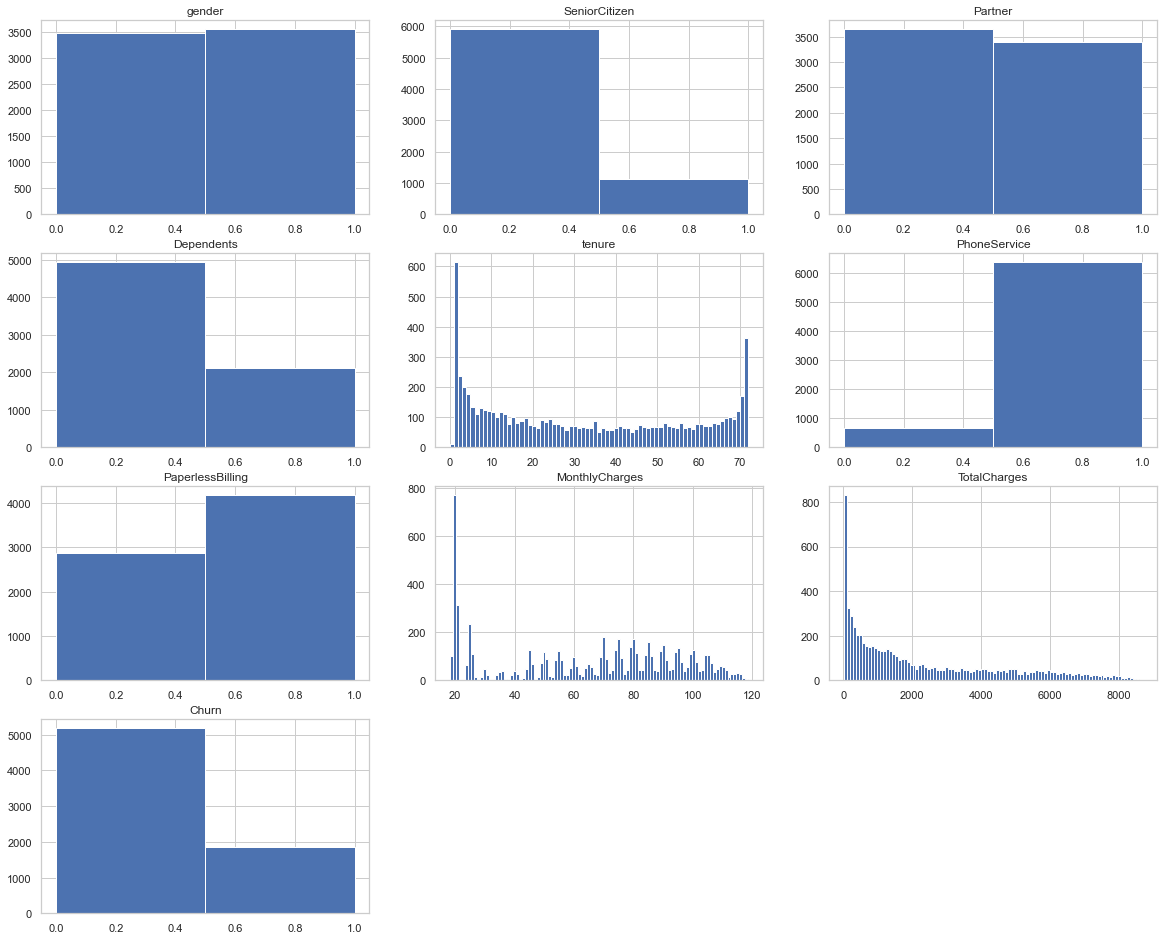

In [203]:
import seaborn as sns
sns.set(style="whitegrid")  
fig = plt.figure(figsize=(20, 25))

for i in range(dataset_num.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(dataset_num.columns.values[i])
    
    vals = np.size(dataset_num.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset_num.iloc[:,i], bins=vals)

#sns.countplot(x="Contract", data=dataset, ax=axs[0, 0])


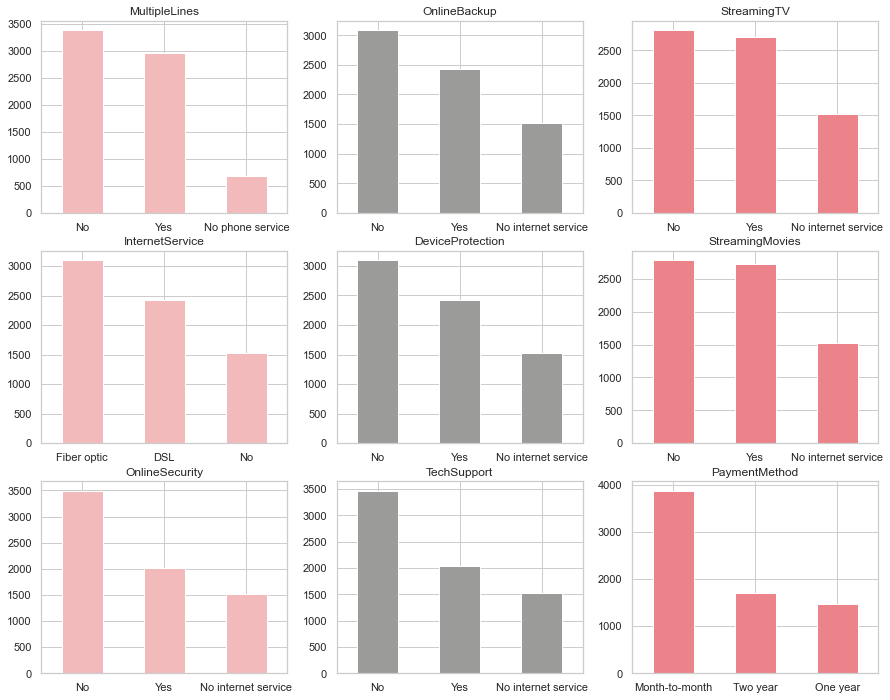

In [204]:

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(cat_list):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

<Figure size 1080x288 with 0 Axes>

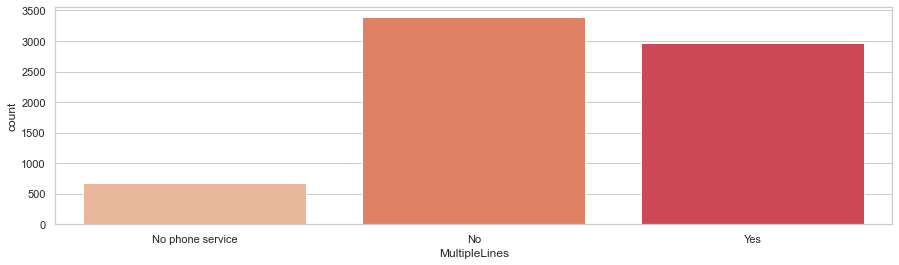

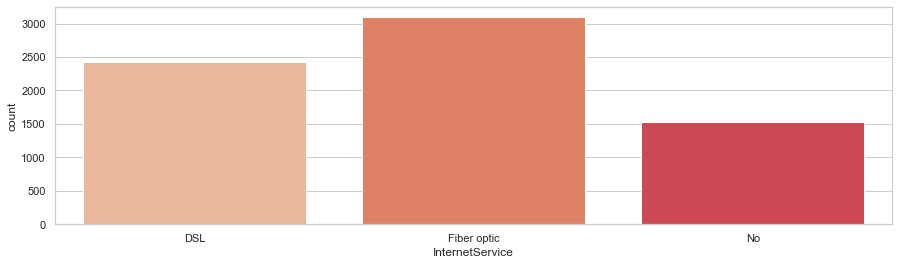

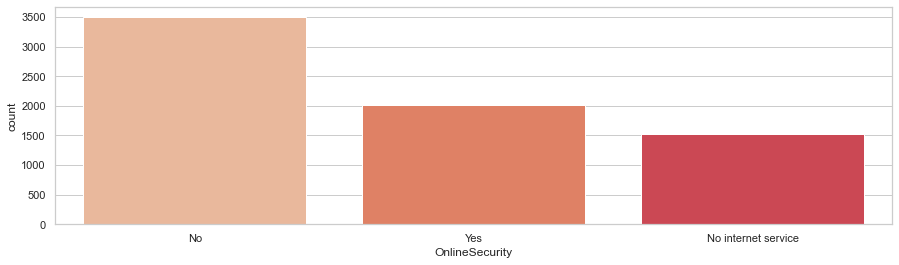

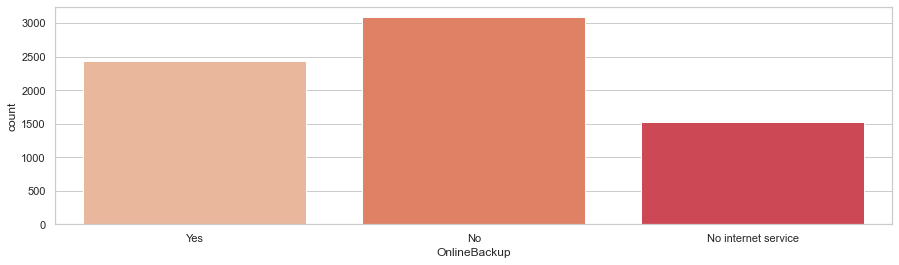

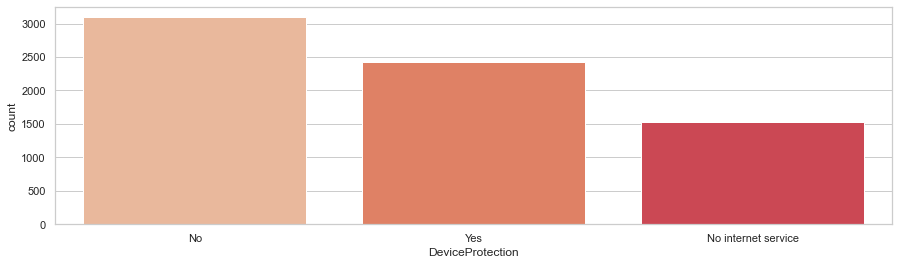

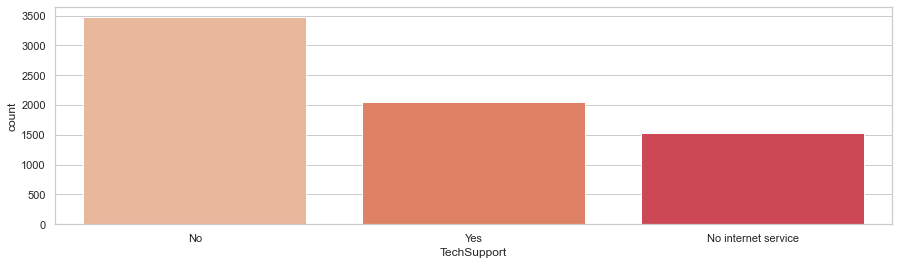

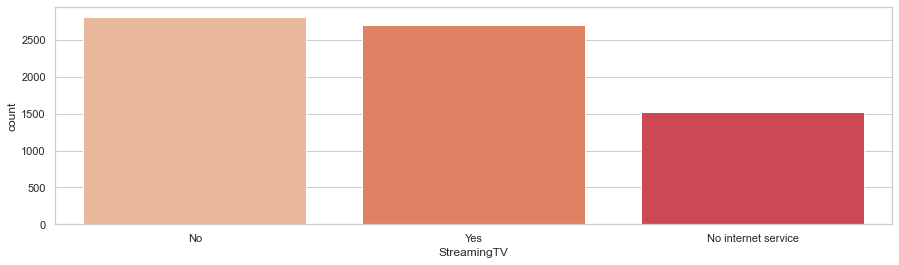

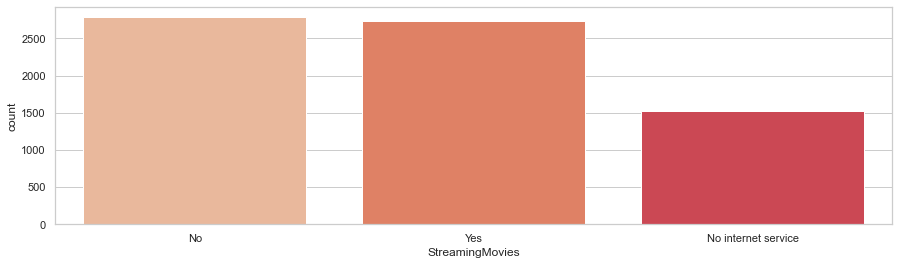

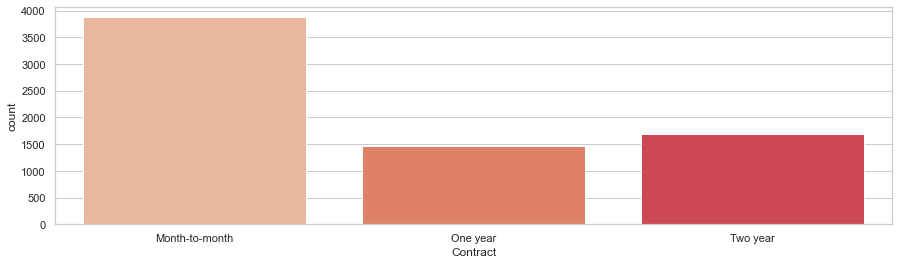

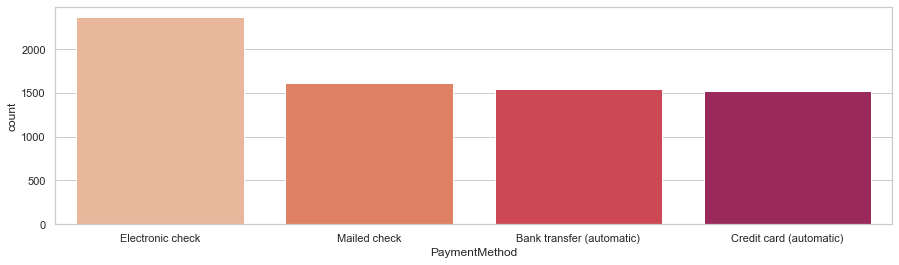

In [205]:
colors = sn.color_palette('rocket_r')
plt.figure(figsize=(15,4))
#sns.set(font_scale=1.2)
#plt.xticks(rotation=45)

for i in cat_list:
    plt.figure(figsize=(15,4))
    sn.countplot(x=i, data=dataset, palette=colors)
    plt.show()

In [206]:
print(data2.default.value_counts())
print('')
print(data2.default.value_counts(normalize=True))

NameError: name 'data2' is not defined

In [ ]:
print(data2.poutcome.value_counts())
print('')
print(data2.poutcome.value_counts(normalize=True))


In [ ]:
num_list

In [ ]:
dataset[num_list].hist(bins=20,figsize=(15,15), layout=(4,4))
#data2[num_list].hist(bins=20,figsize=(15,15), layout=(4,4))

In [ ]:
#print(data2.previous.value_counts())
#print('')
#print(data2.previous.value_counts(normalize=True))


##### Step 9.3a Analyze Churn Rate by Cat Variables

In [ ]:
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, \
                                          grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', \
                                          fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

##### Step 9.3b Analyze Churn Rate by Contract Type and Payment Method

In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


In [ ]:
import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['PaymentMethod','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   


##### Step 9.4 Find Positive and Negative Correlations with Response Variable

In [207]:
dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

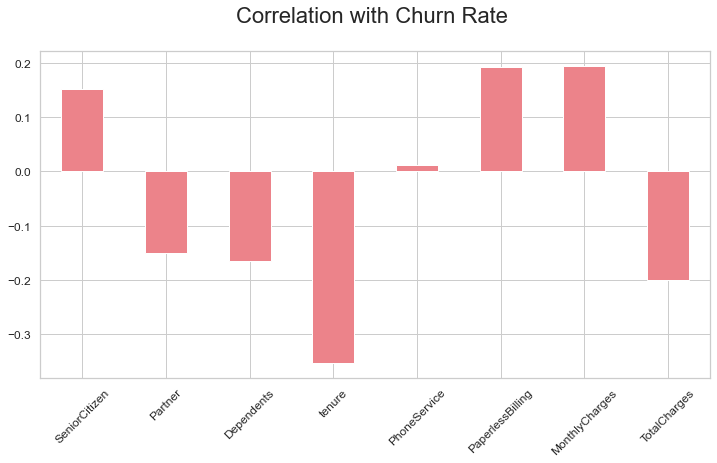

In [208]:
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (12, 6), fontsize = 12, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


##### Step 9.5 Correlation Matrix Plot

<AxesSubplot:>

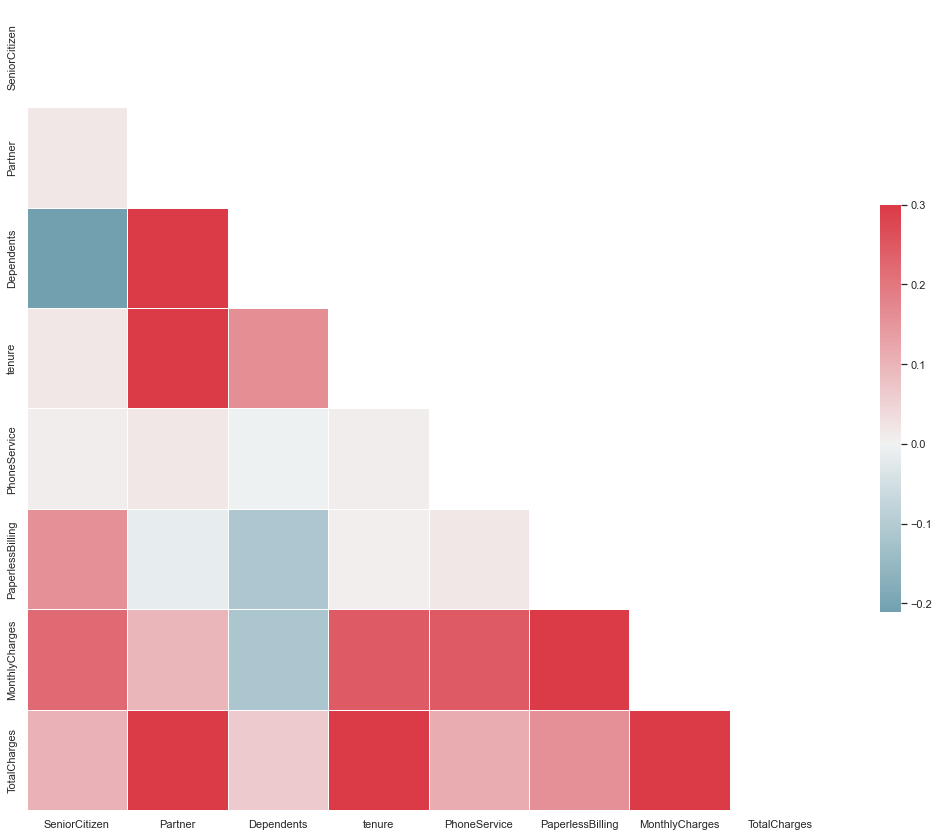

In [209]:
## Set and compute the Correlation Matrix
sn.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(18,15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

##### Step 9.6: Check Multicollinearity using VIF

In [210]:
def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

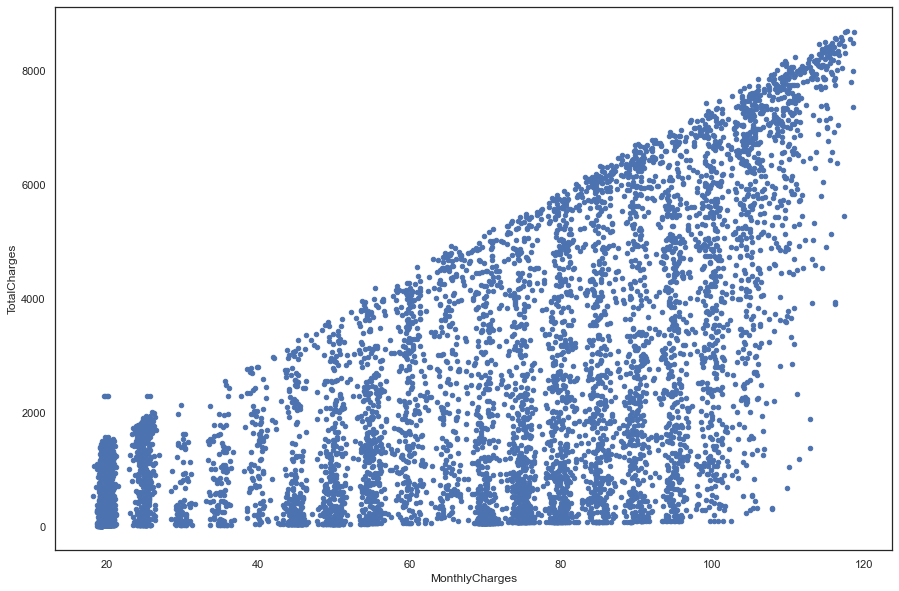

In [211]:
# Total Charges seem to be colinear with Monthly Charges

# Check colinearity

dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15,10), x = 'MonthlyCharges', y='TotalCharges')


In [212]:
dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [213]:
#Applying changes in the main dataset:
    
dataset = dataset.drop(columns = "TotalCharges")  

##### Step 10: Encode Categorical Data

In [214]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [215]:
dataset2 = dataset

In [217]:
cat_list2 = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']
#cat_list2 = ['male','education','currentSmoker','prevalentHyp']

for i in cat_list2:
    dataset2[i] = dataset2[i].astype('str')
    
cat_list2.append('customerID')

In [222]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [223]:
col_list = ['MultipleLines'          
,'InternetService'        
,'OnlineSecurity'         
,'OnlineBackup'           
,'DeviceProtection'       
,'TechSupport'            
,'StreamingTV'            
,'StreamingMovies'        
,'Contract'               
,'PaymentMethod']         

In [224]:
dataset3a = pd.get_dummies(data=dataset2, columns=[col for col in dataset2.columns if col in col_list], drop_first=True)
dataset3b = pd.get_dummies(data=dataset2, columns=[col for col in dataset2.columns if col in col_list])

In [221]:
dataset3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   object 
 3   Partner                                7043 non-null   object 
 4   Dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   object 
 7   PaperlessBilling                       7043 non-null   object 
 8   MonthlyCharges                         7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [122]:
## Don't use this one, it's just a test to see which values are being dropped in the process.
dataset3b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   object 
 3   Partner                                  7043 non-null   object 
 4   Dependents                               7043 non-null   object 
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   object 
 7   PaperlessBilling                         7043 non-null   object 
 8   MonthlyCharges                           7043 non-null   float64
 9   Churn                                    7043 non-null   object 
 10  MultipleLines_No                         7043 no

##### Step 10: Split dataset into dependent and independent variables

In [279]:
response = dataset3a["Churn"]

dataset = dataset3a.drop(columns="Churn")


In [280]:
## In this case, the person who made this code believes that using this "stratify" method can resolve class imbalance

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#He made sure that there was a proportional split when he uses stratify here. Versus SMOTE where we're creating fake data. In this case, since we have a decent customer size for both, no need for SMOTE.
#In the test split, there should be about 80 percent of the customers you keep and others that leave. The stratify makes sure that the 
#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 30)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 30)
Number transactions y_test dataset:  (1409,)


In [281]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])


In [282]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Section C: Model Selection

##### Step 15.1: Compare Baseline Classification Algorithms - First Iteration


In [283]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

In [284]:
#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0


In [289]:
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.25,1.78,74.76,1.29
1,SVC,83.71,1.74,80.17,1.23
6,Random Forest,81.86,1.43,78.63,1.75
4,Gaussian NB,81.79,2.16,65.87,1.66
2,Kernel SVM,80.44,1.96,80.01,1.26
3,KNN,77.42,2.33,75.68,1.76
5,Decision Tree Classifier,66.41,1.77,73.66,1.71


##### Step 15.2: Visualize Classification Algorithms Accuracy Comparisons


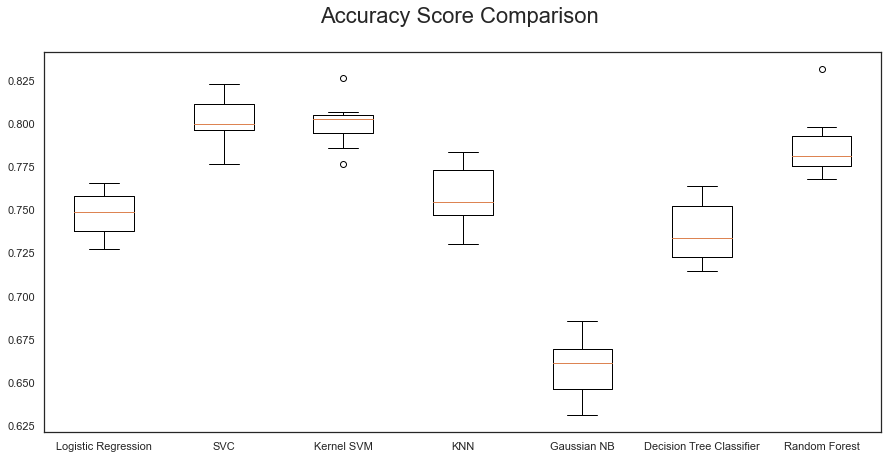

In [290]:
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


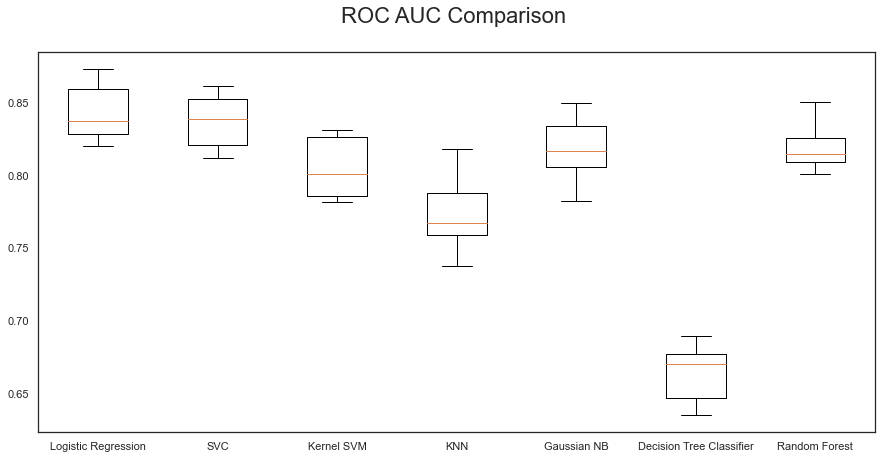

In [291]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()



In [292]:

#------------------------------------------------------------------------------------------
#Compare Baseline Classification Algorithms - Second Iteration
#Using Accuracy, Precision, Recall, F1 and F2 Score Metrics
#-------------------------------------------------------------------------------------------


##### Step 15.3: Get the right parameters for the baseline models


In [293]:
#Identify optimal number of K neighbors for KNN Model:


score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

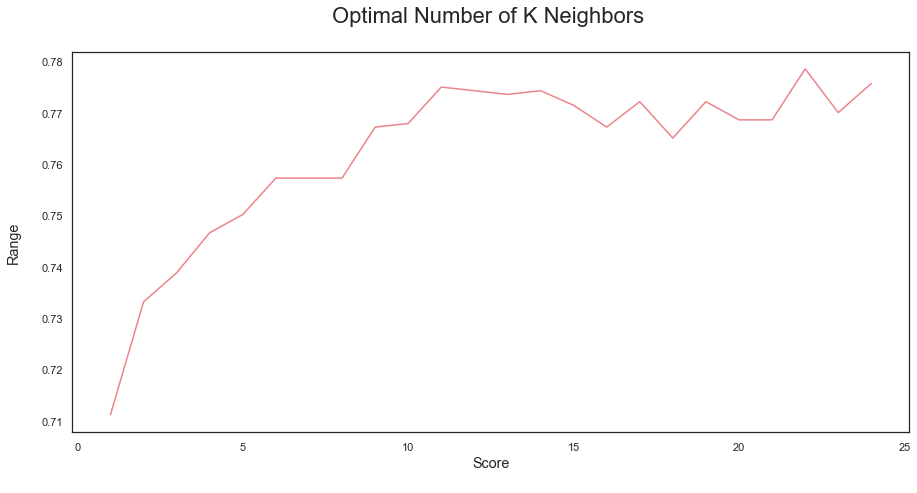

In [294]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

#optimal number of K neigbors = 22

In [295]:
#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

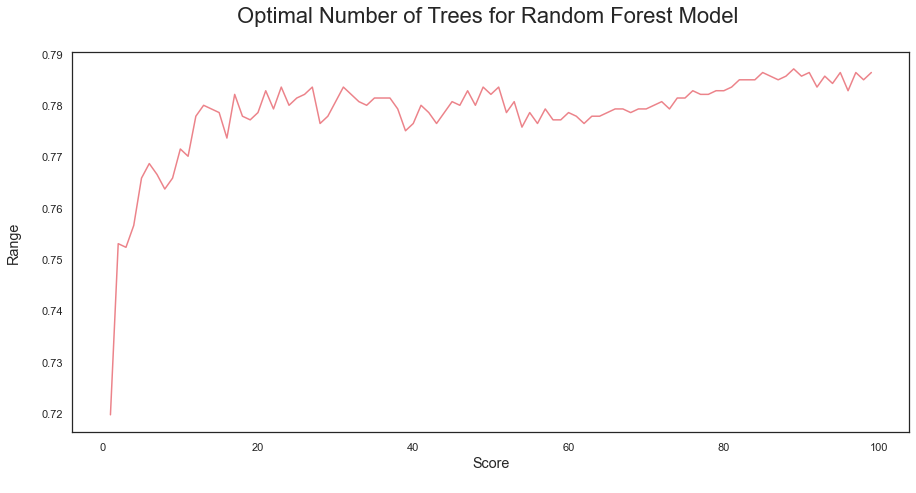

In [296]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()
 
 
#Optimal number of decision trees = around 88

##### Step 15.4 Compare Baseline Classification Algorithms - Second Iteration

##### Step 15.4.1 Logistic Regression

In [297]:
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

##### Step 15.4.2 Support Vector Machine (linear classifier)

In [298]:
# Fitting SVM (SVC class) to the Training set:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


##### Step 15.4.3 K-Nearest Neighbors

In [299]:
classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

##### Step 15.4.4 Kernel SVM

In [300]:
# Fitting Kernel SVM to the Training set:

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


##### Step 15.4.5 Naive Bayes

In [301]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


##### Step 15.4.6 Decision Tree

In [302]:
# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

##### Step 15.4.7 Random Forest

In [303]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 88, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

##### Step 15.5 Visualize the results and compare the baseline algorithms

In [304]:
# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

## Since it's small dataset, Logistic Regression will help separate really well. It will hold even at larger datasets.
## In a hospital setting, you have to know beyond a shadow of a doubt it's true. Choose model and prediction 

#Since we have class imbalance. When we look into the business challenge, 
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.804116   0.654088  0.556150  0.601156  0.573319
1          SVM (Linear)  0.804116   0.652174  0.561497  0.603448  0.577558
6         Random Forest  0.789212   0.642066  0.465241  0.539535  0.492360
3            Kernel SVM  0.792051   0.640138  0.494652  0.558069  0.518207
2  K-Nearest Neighbours  0.778566   0.591716  0.534759  0.561798  0.545256
5         Decision Tree  0.731725   0.494764  0.505348  0.500000  0.503195
4            Naive Byes  0.679205   0.447861  0.895722  0.597148  0.746435


#### Section D: Model Evaluation (Logistic Regression)

##### Step 16: Train and Evaluate Chosen Model

In [305]:
# Fit Logistic Regression on the Training dataset:
    
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)


                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.804116   0.654088  0.55615  0.601156  0.573319


In [306]:

# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.04)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

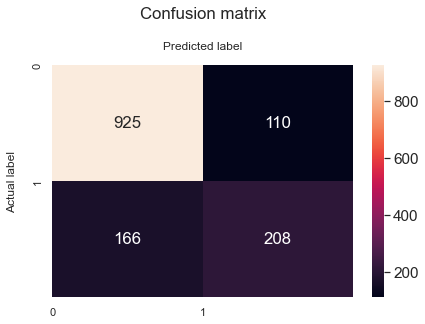

In [307]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


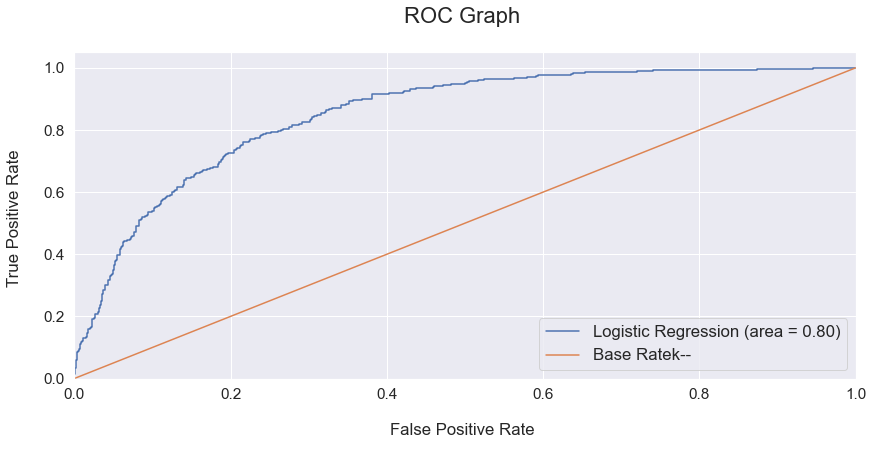

In [308]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


##### Step 17: Predict Feature Importance

In [309]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


,features,coef
10,InternetService_Fiber optic,0.583066
21,StreamingTV_Yes,0.187537
23,StreamingMovies_Yes,0.183328
9,MultipleLines_Yes,0.173360
6,PaperlessBilling,0.166093
27,PaymentMethod_Electronic check,0.145885
1,SeniorCitizen,0.079365
8,MultipleLines_No phone service,0.029109
17,DeviceProtection_Yes,0.023002
28,PaymentMethod_Mailed check,-0.006813


#### Section E: Model Improvement (Logistic Regression)

##### Step 18: Hyperparameter Tuning

In [310]:
# Round 1: -----------------------------------------------------------------
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 2.65 seconds


C:\Users\tleer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tleer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tleer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tleer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
V

(0.7191901919264785, {'C': 10, 'penalty': 'l2'})

In [311]:
# Round 2: -----------------------------------------------------------------
    

# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 0.22 seconds


(0.7182468030898344, {'C': 0.05, 'penalty': 'l2'})

##### Step 18.3: Hyperparameter Tuning and Selection

In [312]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

#### Section F: Comparing Model Predictions Against Test Set

##### Step 19: Compare predictions against test set

In [313]:
#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[925 110]
 [166 208]]


In [314]:

#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])


PRED,0,1
ACTUAL,,
0,157,50
1,61,19


Test Data Accuracy: 0.8041


<Figure size 2016x1440 with 0 Axes>

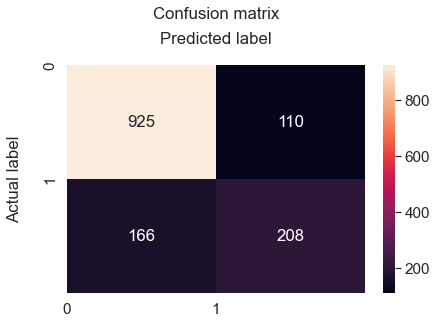

In [315]:

#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



##### Step 20: Format Final Results

In [320]:
## What you need to do here is get the probability off of y_train, qcut y_train. You're creating ten buckets using train, run predict on test, and then you map
## the predicted probability of deciles from train. Apply them to test.

## How Dan does this is potentially inner join and filter out where it is greater than a certain value.
## Ex. Decile 4 is 30-40. You have the propensity to convert, then inner join from where your predicted probability is greater than the minimum of the decile and less than the maximum

## If your first decile is 0-20% in train, anything that has a predicted probability within this during test should receive a 1 in ranking

final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["propensity_to_convert(%)"] = y_pred_probs 

final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)


      customerID  Churn  predictions  propensity_to_convert(%) Ranking
5532  8174-LNWMW      0            0                      1.95       9
5173  2480-SQIOB      0            0                     33.66       4
7010  0723-DRCLG      1            1                     79.61       1
6507  5708-EVONK      1            0                     18.56       5
5985  3585-YNADK      0            0                      4.15       8
...          ...    ...          ...                       ...     ...
3333  4573-JKNAE      0            0                      3.15       9
3053  0960-HUWBM      0            0                      6.46       7
6920  2595-KIWPV      0            0                      1.78       9
4696  9128-CPXKI      0            0                      9.68       7
2246  7181-BQYBV      1            1                     74.75       1

[1409 rows x 5 columns]


In [321]:
final_results['Ranking'].value_counts()

10    141
9     141
8     141
7     141
6     141
4     141
3     141
2     141
1     141
5     140
Name: Ranking, dtype: int64

In [324]:
dataset3a[dataset3a['customerID']=='8174-LNWMW'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5532,8174-LNWMW,0,0,0,0,31,1,0,20.9,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0


In [329]:
dataset3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   object 
 3   Partner                                7043 non-null   object 
 4   Dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   object 
 7   PaperlessBilling                       7043 non-null   object 
 8   MonthlyCharges                         7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [327]:
new_df = pd.merge(dataset3a, final_results, on=['customerID', 'Churn'], how='inner')

In [468]:
new_df.head()

,StudentID,pass_fail_drop_bin_micro,time_between_last_class_and_micro,TEAS,failed_courses_Classes_Failed_1,failed_courses_Classes_failed_2+,terms_at_galen_Terms_At_Galen_2,terms_at_galen_Terms_At_Galen_3,terms_at_galen_Terms_At_Galen_4+,prev_sem_avg_66-70,prev_sem_avg_71-80,prev_sem_avg_81-90,prev_sem_avg_91-100,semester_diff_Grade_Increase,semester_diff_No_Two_Semesters_Prior,predictions,likely_to_pass(%),Ranking
0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,51.88,10
1,10,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,79.98,5
2,16,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,79.98,5
3,25,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,92.55,2
4,33,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,94.94,1


In [330]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             1409 non-null   object  
 1   gender                                 1409 non-null   object  
 2   SeniorCitizen                          1409 non-null   object  
 3   Partner                                1409 non-null   object  
 4   Dependents                             1409 non-null   object  
 5   tenure                                 1409 non-null   int64   
 6   PhoneService                           1409 non-null   object  
 7   PaperlessBilling                       1409 non-null   object  
 8   MonthlyCharges                         1409 non-null   float64 
 9   Churn                                  1409 non-null   int32   
 10  MultipleLines_No phone service         1409 non-null   uint8

In [343]:
pd.qcut(new_df.MonthlyCharges, q=10).value_counts().sort_values(ascending=True)


(20.15, 25.2]      133
(25.2, 49.44]      139
(73.85, 80.2]      140
(86.2, 94.91]      140
(49.44, 63.64]     141
(80.2, 86.2]       141
(94.91, 103.87]    141
(103.87, 118.6]    141
(63.64, 73.85]     142
(18.549, 20.15]    151
Name: MonthlyCharges, dtype: int64

In [344]:
pd.qcut(new_df.MonthlyCharges, q=10, labels=['2','3','6','8','4','7','9','10','5','1']).value_counts().sort_values(ascending=True)

3     133
6     139
7     140
10    140
8     141
9     141
5     141
1     141
4     142
2     151
Name: MonthlyCharges, dtype: int64

In [349]:
new_df['Cost_Bins'] = pd.qcut(new_df.MonthlyCharges, q=10, labels=['2','3','6','8','4','7','9','10','5','1'])
new_df['Cost_Bins'] = new_df['Cost_Bins'].sort_values(ascending=True)

#new_df['Cost_Bins'] = pd.cut(new_df.MonthlyCharges, bins=10)

In [350]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,predictions,propensity_to_convert(%),Ranking,Cost_Bins
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,57.39,2,6
1,9305-CDSKC,0,0,0,0,8,1,1,99.65,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,80.71,1,5
2,7469-LKBCI,1,0,0,0,16,1,0,18.95,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,2.97,9,2
3,8773-HHUOZ,0,0,0,1,17,1,1,64.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,38.28,4,4
4,6827-IEAUQ,0,0,1,1,27,1,0,66.15,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,3.45,8,4


In [ ]:
### https://stackoverflow.com/questions/52381965/using-pandas-crosstab-to-compute-cross-count-on-a-category-column

In [351]:
pd.crosstab(new_df.Ranking, new_df.Cost_Bins, margins=True,
            values=new_df.customerID, aggfunc=pd.Series.nunique)

Cost_Bins,2,3,6,8,4,7,9,10,5,1,All
Ranking,,,,,,,,,,,
10,37.0,37.0,15.0,6.0,16.0,12.0,11.0,6.0,1.0,NaN,141
9,26.0,17.0,12.0,11.0,12.0,14.0,18.0,10.0,4.0,17.0,141
8,24.0,16.0,16.0,18.0,10.0,10.0,8.0,3.0,6.0,30.0,141
7,19.0,15.0,6.0,20.0,13.0,6.0,10.0,9.0,20.0,23.0,141
6,29.0,23.0,10.0,15.0,8.0,6.0,5.0,6.0,14.0,25.0,141
5,16.0,9.0,17.0,25.0,9.0,6.0,10.0,18.0,10.0,20.0,140
4,NaN,1.0,29.0,23.0,16.0,14.0,12.0,14.0,24.0,8.0,141
3,NaN,9.0,22.0,17.0,11.0,18.0,17.0,20.0,19.0,8.0,141
2,NaN,6.0,10.0,5.0,30.0,25.0,19.0,22.0,18.0,6.0,141


------